# This whole exercise was completed by 4 members in a team. These members include:

### 1. Kush Patel (ksp946)

### 2. Soham Siddhant Bidyadhar (sb67347)

### 3. Viswanadhuni Sankeerth (vps386)

### 4. Gaurav Shukla (gs34327)


***
***
# <font color='orange'> Probability Practice </font>
***Probability questions were actually solved on pen and paper first. That is why most of the content is either in markdown file or in the comment section***
***
******************

***a***

P_RC = 0.3 : ***expected fraction of random clickers is 0.3***


P_TC = 1 - P_RC


P_Yes_Given_RC = 0.5 : ***Random Clickers choose "Yes" or "No" with equal probability***


P_Yes = 0.65 ***Overall, 65% said "Yes"***

Using the rule of total probability


P(Yes) = P(RC)×P(Yes | RC) + P(TC)×P(Yes | TC)


0.65 == (0.3×0.5) + (0.7×P_Yes_Given_TC)

In [315]:
P_Yes_Given_TC = 0.5/0.7
print(P_Yes_Given_TC)

0.7142857142857143


***fraction of people who are truthful clickers and answered yes : 71.428%***

******************
***b***
******************

P(D): Probability that a person has the disease = 0.000025.01.


P(-D) : Probability that a person does not have the disease = 1 - P(D) = 0.999975.

P(T+ | D): Probability of testing positive given that the person has the disease (sensitivity) = 0.993.

P(T− | -D): Probability of testing negative given that the person does not have the disease (specificity) = 0.9999.

P(T+ | -D): Probability of testing positive given that the person does not have the disease = 1 - P(T− | -D)P(T− | -D) = 0.0001.


**Using Bayes' Theorem:**

P(D | T+) = P(T+ | D)*P(D) / P(T+)
​	
 

**Where:**
P(T+) = P(T+ | D)* P(D) + P(T+ | -D)* P(-D)

P(T+) = (0.993*0.000025)+(0.0001*0.999975)

P(T+) = 0.0001248225

P(D | T+) = 0.993 * 0.000025 / 0.0001248225
​	
P(D | T+) = 0.1988

***Suppose someone tests positive, the probability that they have the disease is 19.88%***

******************
***
# <font color='orange'> Wrangling the Billboard Top 100 </font>
******************
***

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn.manifold import TSNE
%pylab inline
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['disp', 'cm', 'imshow']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/dpuelz/STA380/master/data/billboard.csv')

In [7]:
df = df[['performer', 'song', 'year', 'week', 'week_position']]

***
***a***
***

In [9]:
top_10 = df.groupby(['performer', 'song'])['week'].count().sort_values(ascending = False).reset_index(name='count')

In [13]:
print( "These are the top 10 most popular songs")
print("")
top_10[:10]


These are the top 10 most popular songs



performer  \
0                            Imagine Dragons   
1                                 AWOLNATION   
2                                 The Weeknd   
3                                 Jason Mraz   
4                                LeAnn Rimes   
5                                OneRepublic   
6  LMFAO Featuring Lauren Bennett & GoonRock   
7                                      Jewel   
8                                      Adele   
9                           Carrie Underwood   

                                  song  count  
0                          Radioactive     87  
1                                 Sail     79  
2                      Blinding Lights     76  
3                            I'm Yours     76  
4                        How Do I Live     69  
5                       Counting Stars     68  
6                    Party Rock Anthem     68  
7  Foolish Games/You Were Meant For Me     65  
8                  Rolling In The Deep     65  
9                     Before He Cheats     64

***
***b***
***

In [16]:
musical_diversity = df[~df['year'].isin([1958, 2021])]

In [18]:
musical_diversity['unique_song'] = musical_diversity['performer'] + '_' + musical_diversity['song']

/var/folders/f_/761zdxqd4xj6cs5ww2w054x40000gn/T/ipykernel_42428/4163164328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musical_diversity['unique_song'] = musical_diversity['performer'] + '_' + musical_diversity['song']


In [20]:
musical_diversity = musical_diversity.groupby(['year', 'performer', 'unique_song'])['unique_song'].size().reset_index(name='count')#.sort_values(ascending = False)

In [22]:
musical_diversity

year                     performer  \
0      1959                      5 Satins   
1      1959              Addrisi Brothers   
2      1959                    Al Martino   
3      1959                    Al Martino   
4      1959  Andre Previn With David Rose   
...     ...                           ...   
35073  2020                Zac Brown Band   
35074  2020                          Zayn   
35075  2020                     blackbear   
35076  2020    surf mesa Featuring Emilee   
35077  2020             twenty one pilots   

                                         unique_song  count  
0                                   5 Satins_Shadows      3  
1                       Addrisi Brothers_Cherrystone      6  
2                     Al Martino_Darling, I Love You      6  
3         Al Martino_I Can't Get You Out Of My Heart      9  
4            Andre Previn With David Rose_Like Young     12  
...                                              ...    ...  
35073  Zac Brown Band_The Man Who Loves You The Most      1  
35074                                    Zayn_Better      1  
35075                      blackbear_Hot Girl Bummer     28  
35076                 surf mesa Featuring Emilee_ily     28  
35077             twenty one pilots_Level Of Concern     11  

[35078 rows x 4 columns]

In [24]:
musical_diversity_count = musical_diversity.groupby('year')['year'].size().reset_index(name = 'diversity_count')

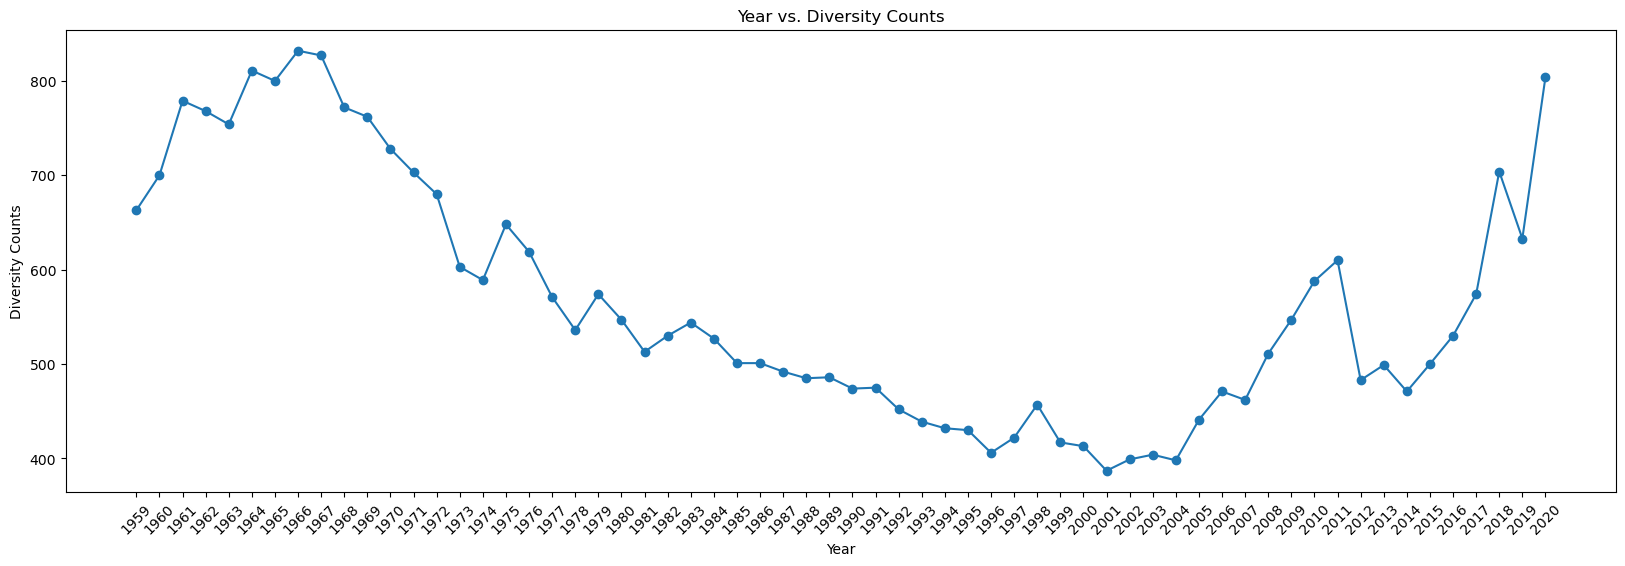

In [26]:
#df = df.reset_index()

# Plotting the line graph
plt.figure(figsize=(20, 6))
plt.plot(musical_diversity_count['year'], musical_diversity_count['diversity_count'], marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Diversity Counts')
plt.title('Year vs. Diversity Counts')
plt.xticks(musical_diversity_count['year'], rotation=45)
# Displaying the plot
plt.show()


***Above graph shows the musical diversity***

***
***c***
***

In [30]:
df['unique_song'] = df['performer'] + '_' + df['song']

In [32]:
week_count = df.groupby(['performer', 'unique_song'])['unique_song'].size().reset_index(name = 'count')

In [34]:
week_count = week_count[week_count['count'] >= 10]

In [36]:
ten_w_hit_artist = week_count.groupby('performer').filter(lambda x: len(x) >= 30)#.size().reset_index(name = 'count')

In [38]:
ten_w_hit_artist = ten_w_hit_artist.groupby('performer')['performer'].size().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

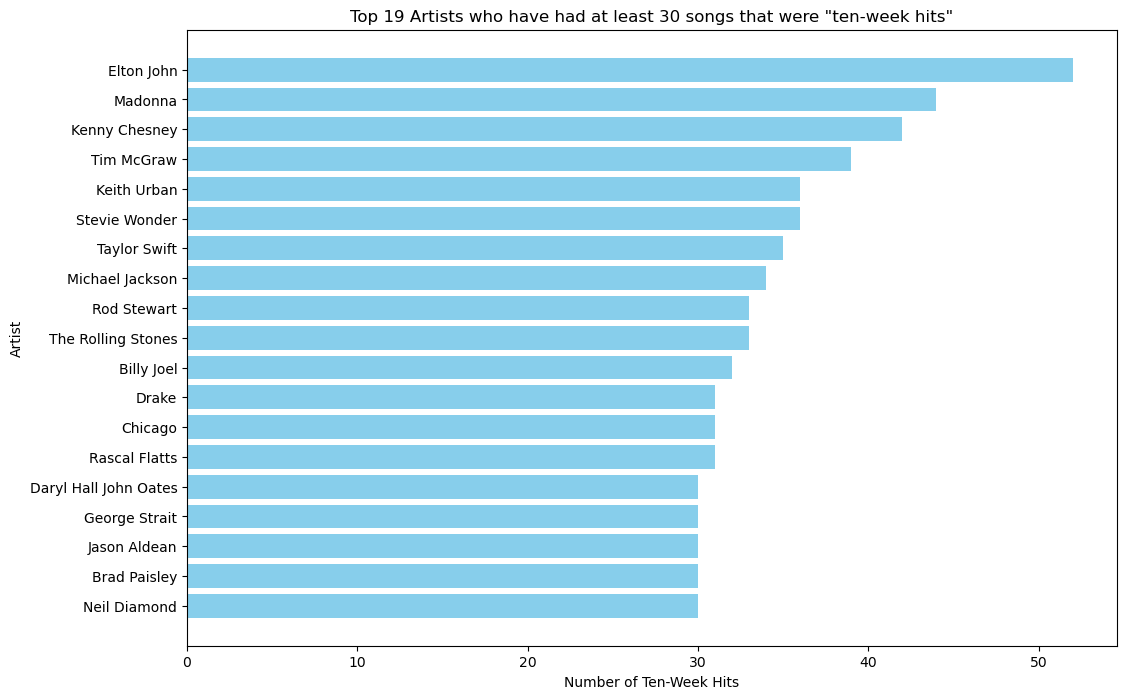

In [40]:
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
plt.barh(ten_w_hit_artist['performer'], ten_w_hit_artist['count'], color='skyblue')

# Labeling the axes and title
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.title('Top 19 Artists who have had at least 30 songs that were "ten-week hits"')

# Invert y-axis to have the artist with the most hits on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

***
***
# <font color='orange'>  Visual story telling part 1: green buildings </font> 
***
***

In [46]:
df_green_buildings = pd.read_csv('https://raw.githubusercontent.com/dpuelz/STA380/master/data/greenbuildings.csv')


In [47]:
df = df_green_buildings[df_green_buildings['leasing_rate']>10]
df = df.copy()

In [48]:

# Determine building classes
df.loc[:, 'building_class'] = df.apply(
    lambda row: 'Class A' if row['class_a'] == 1 else ('Class B' if row['class_b'] == 1 else 'Class C'), axis=1
)

# Calculate the percentage distribution of buildings across classes
distribution_table = df.groupby(['green_rating', 'building_class']).size().unstack(fill_value=0)

distribution_table.index = ['Non-Green', 'Green']

# Normalize to get percentages within each green rating category
percentage_distribution_table = distribution_table.div(distribution_table.sum(axis=1), axis=0) * 100

# Format the percentage distribution with '%' symbol and round to 2 decimal places
percentage_distribution_table = percentage_distribution_table.round(2).astype(str) + '%'

# Rename the index for clarity
# percentage_distribution_table.index = ['Non-Green', 'Green']

# Display the table
print(percentage_distribution_table)
print("")
print (distribution_table)

building_class Class A Class B Class C
Non-Green       37.01%  48.48%  14.51%
Green           79.82%  19.15%   1.02%

building_class  Class A  Class B  Class C
Non-Green          2589     3391     1015
Green               546      131        7


In [49]:
df.columns

Index(['CS_PropertyID', 'cluster', 'size', 'empl_gr', 'Rent', 'leasing_rate',
       'stories', 'age', 'renovated', 'class_a', 'class_b', 'LEED',
       'Energystar', 'green_rating', 'net', 'amenities', 'cd_total_07',
       'hd_total07', 'total_dd_07', 'Precipitation', 'Gas_Costs',
       'Electricity_Costs', 'cluster_rent', 'building_class'],
      dtype='object')

***Above 2 tables show the distribution of green vs. non green buildings across 3 classes. It's clear that most of the green buildings are categorized as class A. Now let's analyze the median rent analysis done by Excel guru***
********

In [55]:
# Calculate the overall median rent for green vs. non-green buildings across the whole dataset
overall_median_rent_only = df.groupby('green_rating')['Rent'].median()

# Rename the index for clarity
overall_median_rent_only.index = ['Non-Green', 'Green']

# Convert to DataFrame for display
overall_median_rent_df = overall_median_rent_only.to_frame(name='Median Rent')


# Calculate the median rent for green vs. non-green buildings in each class
median_rent_table = df.groupby(['green_rating', 'building_class'])['Rent'].median().unstack()
# Rename the index and columns for clarity
median_rent_table.index = ['Non-Green', 'Green']
median_rent_table.columns = ['Class A', 'Class B', 'Class C']

# Display the table
print(overall_median_rent_df)
print("")
print(median_rent_table)

           Median Rent
Non-Green        25.03
Green            27.60

           Class A  Class B  Class C
Non-Green    28.20     24.0    22.11
Green        28.44     25.2    32.00


***
It is clear that Excel Guru did not consider class wise division of buildings. 80% of green buildings are in class A and the median rent is approximately equal to non-green buildings. It's mostly because of class C which is skewing the overall median difference due to huge difference in Median rent.
*****
Now, considering the information : ***"a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown; The baseline construction costs are $100 million"***, we can safely assume that it is going to be an A class building. So we filter out our data just to analyse Class A buildings now.

In [58]:
df_a = df[df['class_a'] == 1]

In [60]:
df = df.dropna()

Now, as we are building a 15 story building, it would be better to look at the "rent" distribution of Class A of green buildings and compare the rents of these vs. cluster rent. This would give us more balanced Idea on rent of the current market based on how big the building is, age of the building and how is the relationship with the cluster rent. So let's look at that

In [63]:
df_g15 = df[(df['stories'] == 15) & (df['green_rating'] == 1)]
df_Ng15 = df[(df['stories'] == 15) & (df['green_rating'] == 0)]
df_all = df[(df['stories'] == 15)]


In [65]:
print("median rent of 15 stories class A GB: ",df_g15['Rent'].median())
print("median rent of 15 stories class A NGB: ",df_Ng15['Rent'].median())
print("median rent of 15 stories class A All Building: ",df_all['Rent'].median())
print("median cluster_rent of 15 stories class A GB: ",df_g15['cluster_rent'].median())
print("median cluster_rent of 15 stories class A NGB: ",df_Ng15['cluster_rent'].median())
print("median cluster_rent of 15 stories class A All Building: ",df_all['cluster_rent'].median())

median rent of 15 stories class A GB:  36.955
median rent of 15 stories class A NGB:  24.36
median rent of 15 stories class A All Building:  24.47
median cluster_rent of 15 stories class A GB:  34.9625
median cluster_rent of 15 stories class A NGB:  23.08
median cluster_rent of 15 stories class A All Building:  23.24


1. As we can see, from the table, that except 1 or 2 values for cluster_rent and rent, all other values 25+.
2. Comparison of median Rent for Class A :

        Green Building Vs. Non Green Building, Vs. All Buildings
        median rent of 15 stories class A GB:  36.955
        median rent of 15 stories class A NGB:  24.36
        median rent of 15 stories class A All Building:  24.47

   
4. Also, minimum age of these buildings is 16 years. And as we are building a new one
5. 85% of the overall Class A green buildings have leasing rate greater than 80%. And 50% of class A green building have Leasing rate > 95%

Considering the above 3 facts, let's calculate the breakeven cost for 2 different leasing rate and median rent difference

In [69]:
b_area = 250000
conservative_leasing_rate = 0.8
optimistic_leasing_rate = 0.9
gb_median = 36.955
ngb_median = 24.36
difference = gb_median - ngb_median

In [71]:
additional_earnings = 250000*difference

In [73]:
#recovery time for certification cost with 100% leasing rate
recovery_time = 5000000 / additional_earnings
recovery_time

1.587931718936086

In [75]:
#recovery time for certification cost with 80% and 90% leasing rate
rt_80 = recovery_time/0.8
rt_90 = recovery_time/0.9
print (rt_80, rt_90)

1.9849146486701075 1.764368576595651


***
***We can see that, even in case of 80% leasing rate, the cost would be recovered within 2 years if we have the green building***
***

Just to see it graphically, let's see the distribution of price for class A 15 stories buildings for 2 building types

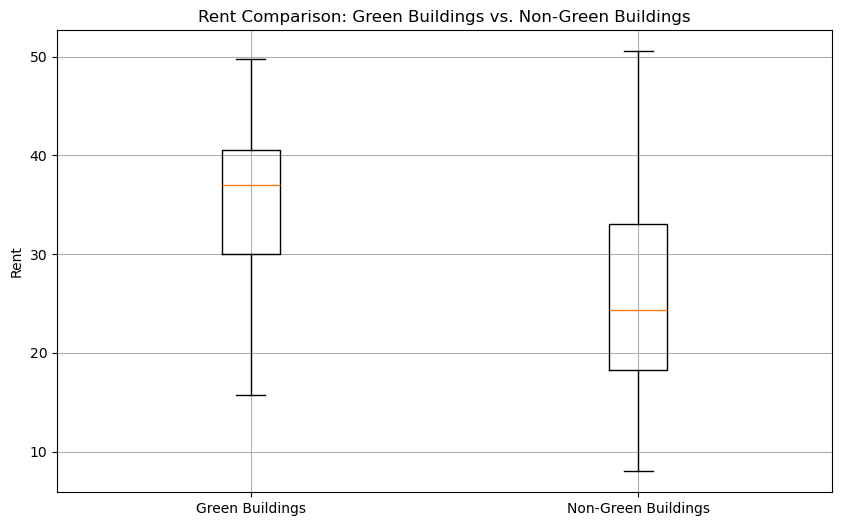

In [79]:
# Create box plots for rent comparison between green and non-green buildings
plt.figure(figsize=(10, 6))

# Box plot for green and non-green buildings
data_to_plot = [df_g15['Rent'], df_Ng15['Rent']]
plt.boxplot(data_to_plot, labels=['Green Buildings', 'Non-Green Buildings'])

plt.title('Rent Comparison: Green Buildings vs. Non-Green Buildings')
plt.ylabel('Rent')
plt.grid(True)

# Display the plot
plt.show()

***The box plot clearly shows that there is significant difference in median price of green vs. non green buildings in Class A for evey 15 story buildings***

***

***
***
# <font color='orange'> Visual story telling part 2: Capital Metro data </font>
****

In [85]:
df_cap_metro = pd.read_csv('https://raw.githubusercontent.com/dpuelz/STA380/master/data/capmetro_UT.csv')


In [86]:
#interaction with cap metro
df_cap_metro['ridership'] = df_cap_metro['boarding'] + df_cap_metro['alighting']


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

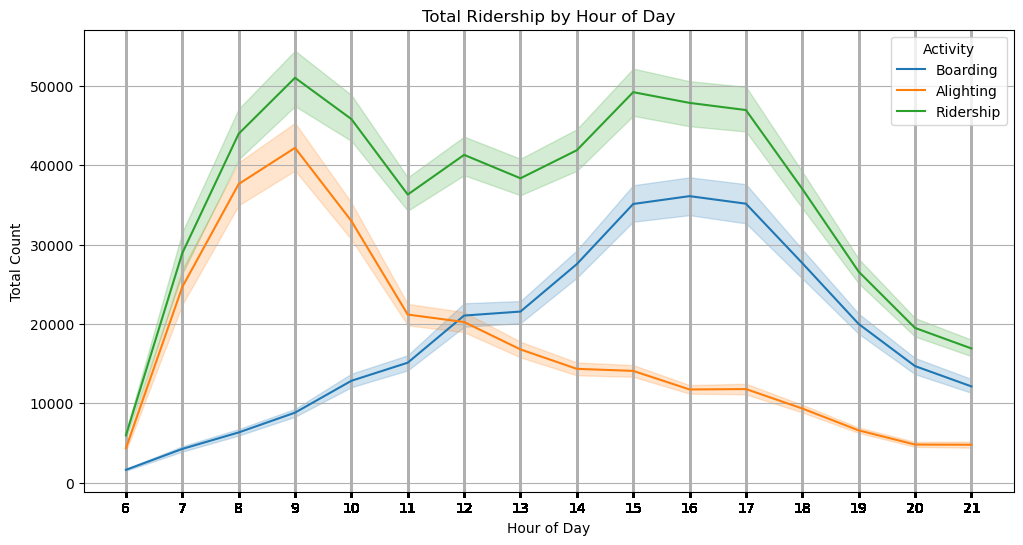

In [90]:
# Total Ridership by Hour of Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='boarding', data=df_cap_metro, estimator='sum', label='Boarding')
sns.lineplot(x='hour_of_day', y='alighting', data=df_cap_metro, estimator='sum', label='Alighting')
sns.lineplot(x='hour_of_day', y='ridership', data=df_cap_metro, estimator='sum', label='Ridership')
plt.title('Total Ridership by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Count')
plt.xticks(df_cap_metro['hour_of_day'])
plt.legend(title='Activity')
plt.grid(True)
plt.show()

1. ***The two distinct peaks in the morning and late afternoon*** strongly indicate that bus ridership is driven primarily by the commuting patterns of students, faculty, and staff. This ***aligns with typical work and school / class schedules***
2. The ***patterns observed can help Capital Metro*** better understand the needs of the passengers, and adjust its services to better meet those needs, ensuring buses are available when they are most needed and ***avoiding underutilization during quieter periods*** (such as afternoon, early morning and late evening)
3. Although there is a decline in ridership after 6 PM, it’s still substantial compared to the very early morning hours. This suggests that there is still a ***significant demand for bus services in the evening, perhaps for students attending evening classes or other campus activities***

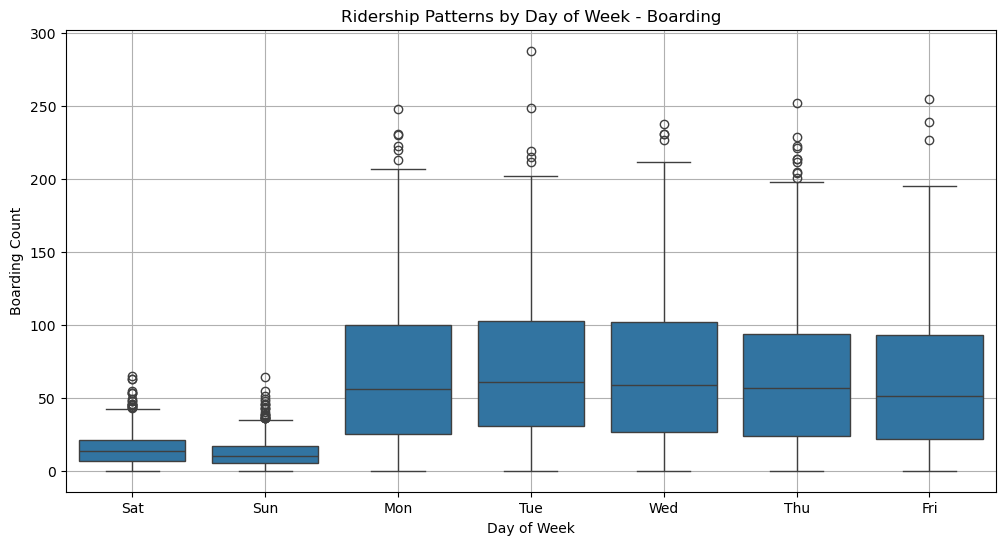

In [94]:
# Ridership Patterns by Day of Week - Boarding
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='boarding', data=df_cap_metro)
plt.title('Ridership Patterns by Day of Week - Boarding')
plt.xlabel('Day of Week')
plt.ylabel('Boarding Count')
plt.grid(True)
plt.show()

1. There is a clear distinction between weekdays and weekends. Weekdays (Monday to Friday) generally see higher ridership, while weekends show significantly lower ridership.
2. The consistent ridership across most weekdays suggests that the current service schedule aligns well with user demand on these days. However, monitoring outliers could help in identifying specific intervals that may require additional attention or service adjustment
3. The lower but consistent ridership on weekends indicates that while fewer people use the bus service, there is still a stable base of users. Understanding the needs of this group could help in optimizing weekend services without significantly disrupting access

***
***
# <font color='orange'> Market Segmentation </font>
****
***

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [224]:
df = pd.read_csv('https://raw.githubusercontent.com/dpuelz/STA380/master/data/social_marketing.csv')
df

Unnamed: 0  chatter  current_events  travel  photo_sharing  \
0     hmjoe4g3k        2               0       2              2   
1     clk1m5w8s        3               3       2              1   
2     jcsovtak3        6               3       4              3   
3     3oeb4hiln        1               5       2              2   
4     fd75x1vgk        5               2       0              6   
...         ...      ...             ...     ...            ...   
7877  y3ijoqfgd        5               4       2              1   
7878  n6gud4ext        9               3       2              4   
7879  f71rt6cyg        3               2       1              1   
7880  gevsyip7o        3               2       0              4   
7881  ejhw263x1        1               4       1              2   

      uncategorized  tv_film  sports_fandom  politics  food  ...  religion  \
0                 2        1              1         0     4  ...         1   
1                 1        1              4         1     2  ...         0   
2                 1        5              0         2     1  ...         0   
3                 0        1              0         1     0  ...         0   
4                 1        0              0         2     0  ...         0   
...             ...      ...            ...       ...   ...  ...       ...   
7877              0        1              0         1     0  ...         0   
7878              0        1              0         4     1  ...         0   
7879              0        4              1         2     1  ...         1   
7880              0        0              1         1     1  ...         0   
7881              0       11              1         0     1  ...         0   

      beauty  parenting  dating  school  personal_fitness  fashion  \
0          0          1       1       0                11        0   
1          0          0       1       4                 0        0   
2          1          0       1       0                 0        1   
3          1          0       0       0                 0        0   
4          0          0       0       0                 0        0   
...      ...        ...     ...     ...               ...      ...   
7877       0          0       0       0                 2        0   
7878       1          0       1       0                 5        0   
7879       0          1       1       0                 6        1   
7880       0          1       0       0                 1        1   
7881       1          0       0       1                 1        1   

      small_business  spam  adult  
0                  0     0      0  
1                  0     0      0  
2                  0     0      0  
3                  0     0      0  
4                  1     0      0  
...              ...   ...    ...  
7877               0     0      0  
7878               1     0      0  
7879               0     0      0  
7880               0     1     12  
7881               2     0      0  

[7882 rows x 37 columns]

In [226]:
# Check for missing data
df.isnull().sum()

Unnamed: 0          0
chatter             0
current_events      0
travel              0
photo_sharing       0
uncategorized       0
tv_film             0
sports_fandom       0
politics            0
food                0
family              0
home_and_garden     0
music               0
news                0
online_gaming       0
shopping            0
health_nutrition    0
college_uni         0
sports_playing      0
cooking             0
eco                 0
computers           0
business            0
outdoors            0
crafts              0
automotive          0
art                 0
religion            0
beauty              0
parenting           0
dating              0
school              0
personal_fitness    0
fashion             0
small_business      0
spam                0
adult               0
dtype: int64

In [228]:
#see the range 
df.describe()

chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.160917     3.031113     1.775557     1.132562  ...   
min       0.000000       0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000       0.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000       1.000000     1.000000     1.000000     1.000000  ...   
75%       1.000000       2.000000     2.000000     2.000000     1.000000  ...   
max      17.000000      20.000000    37.000000    16.000000    10.000000  ...   

          religion       beauty    parenting       dating       school  \
count  7882.000000  7882.000000  7882.000000  7882.000000  7882.000000   
mean      1.095407     0.705151     0.921340     0.710860     0.767699   
std       1.914829     1.327903     1.515359     1.782347     1.188259   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max      20.000000    14.000000    14.000000    24.000000    11.000000   

       personal_fitness      fashion  small_business         spam        adult  
count       7882.000000  7882.000000     7882.000000  7882.000000  7882.000000  
mean           1.462065     0.996574        0.336336     0.006470     0.403324  
std            2.405244     1.828412        0.618147     0.083288     1.813428  
min            0.000000     0.000000        0.000000     0.000000     0.000000  
25%            0.000000     0.000000        0.000000     0.000000     0.000000  
50%            0.000000     0.000000        0.000000     0.000000     0.000000  
75%            2.000000     1.000000        1.000000     0.000000     0.000000  
max           19.000000    18.000000        6.000000     2.000000    26.000000  

[8 rows x 36 columns]

In [230]:
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean

chatter  current_events  travel  photo_sharing  uncategorized  tv_film  \
0           2               0       2              2              2        1   
1           3               3       2              1              1        1   
2           6               3       4              3              1        5   
3           1               5       2              2              0        1   
4           5               2       0              6              1        0   
...       ...             ...     ...            ...            ...      ...   
7877        5               4       2              1              0        1   
7878        9               3       2              4              0        1   
7879        3               2       1              1              0        4   
7880        3               2       0              4              0        0   
7881        1               4       1              2              0       11   

      sports_fandom  politics  food  family  ...  religion  beauty  parenting  \
0                 1         0     4       1  ...         1       0          1   
1                 4         1     2       2  ...         0       0          0   
2                 0         2     1       1  ...         0       1          0   
3                 0         1     0       1  ...         0       1          0   
4                 0         2     0       1  ...         0       0          0   
...             ...       ...   ...     ...  ...       ...     ...        ...   
7877              0         1     0       0  ...         0       0          0   
7878              0         4     1       3  ...         0       1          0   
7879              1         2     1       0  ...         1       0          1   
7880              1         1     1       1  ...         0       0          1   
7881              1         0     1       3  ...         0       1          0   

      dating  school  personal_fitness  fashion  small_business  spam  adult  
0          1       0                11        0               0     0      0  
1          1       4                 0        0               0     0      0  
2          1       0                 0        1               0     0      0  
3          0       0                 0        0               0     0      0  
4          0       0                 0        0               1     0      0  
...      ...     ...               ...      ...             ...   ...    ...  
7877       0       0                 2        0               0     0      0  
7878       1       0                 5        0               1     0      0  
7879       1       0                 6        1               0     0      0  
7880       0       0                 1        1               0     1     12  
7881       0       1                 1        1               2     0      0  

[7882 rows x 36 columns]

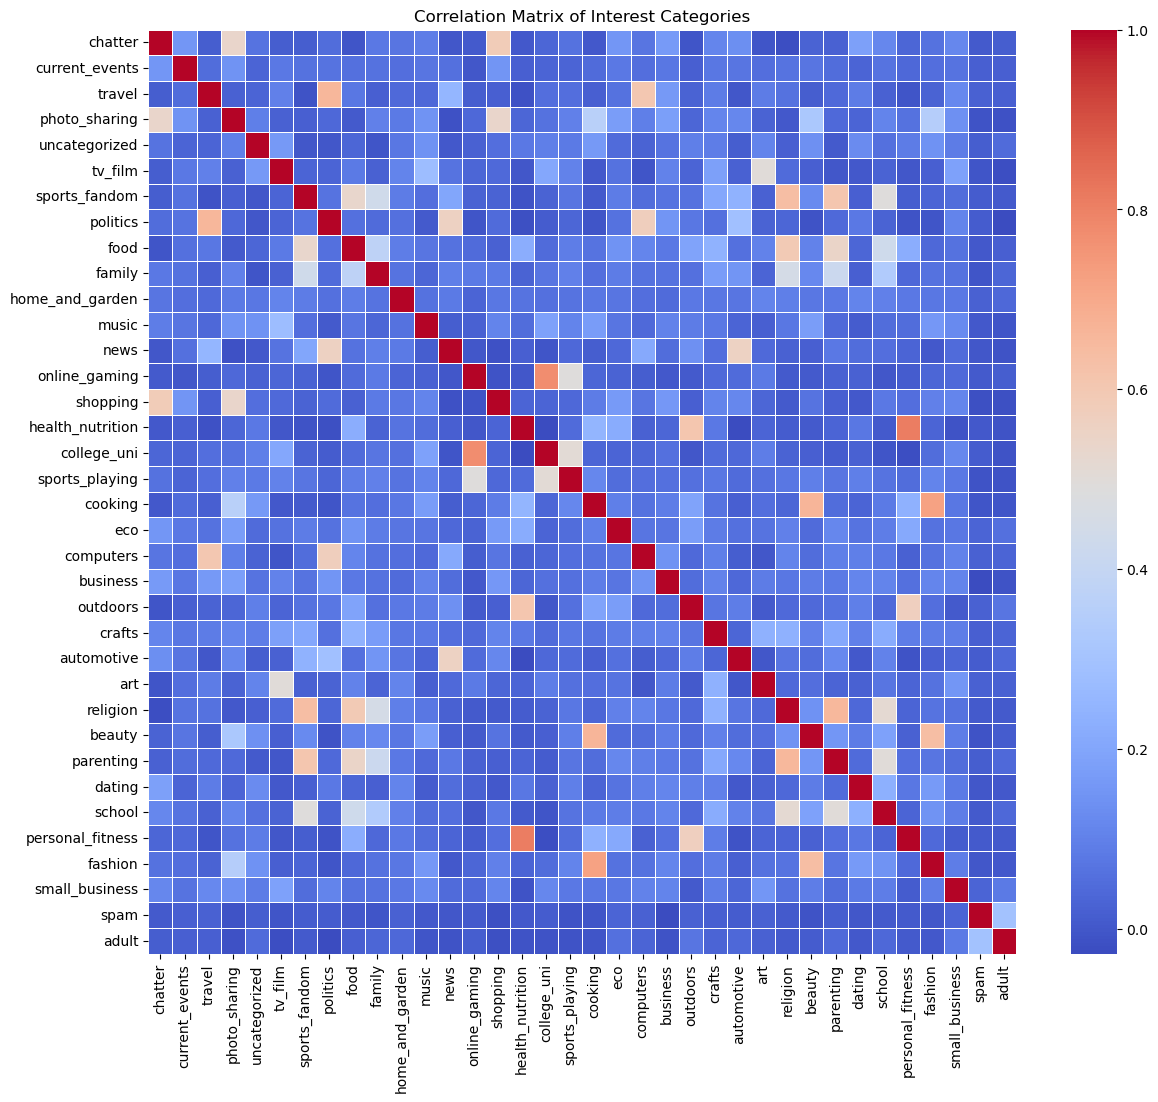

In [232]:
correlation_matrix = df_clean.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Interest Categories')
plt.show()

This correlation matrix provides a detailed view of how different interest categories relate to one another, based on their correlation coefficients. Here are some key observations:

* Diagonal Red Line (Perfect Correlation): The red squares along the diagonal represent a perfect correlation of 1.0, which indicates that each category is perfectly correlated with itself. This is expected and serves as a reference point in the matrix.

* Low to Moderate Correlations: Most of the off-diagonal cells are various shades of blue, which indicates low to moderate correlations (closer to 0). This suggests that for the most part, interests in different categories do not strongly influence one another. For example, "sports_fandom" and "religion" or "politics" and "online_gaming" have low correlations, indicating that these interests do not typically coincide.
* Notable Positive Correlations: A few cells are shaded in lighter colors, indicating moderate to strong positive correlations (closer to 1 but less than 1). These can be interpreted as pairs of categories where interest in one is more likely to be associated with interest in the other. For instance, there is a notable correlation between "travel" and "photo_sharing," which makes sense as people who are interested in travel may also be interested in sharing photos. Another example might be the correlation between "shopping" and "fashion," reflecting a likely connection between these interests.
Overall, this matrix is useful for identifying patterns of co-interest among various categories, helping to understand how different interest areas might cluster together in terms of user behavior or preferences.

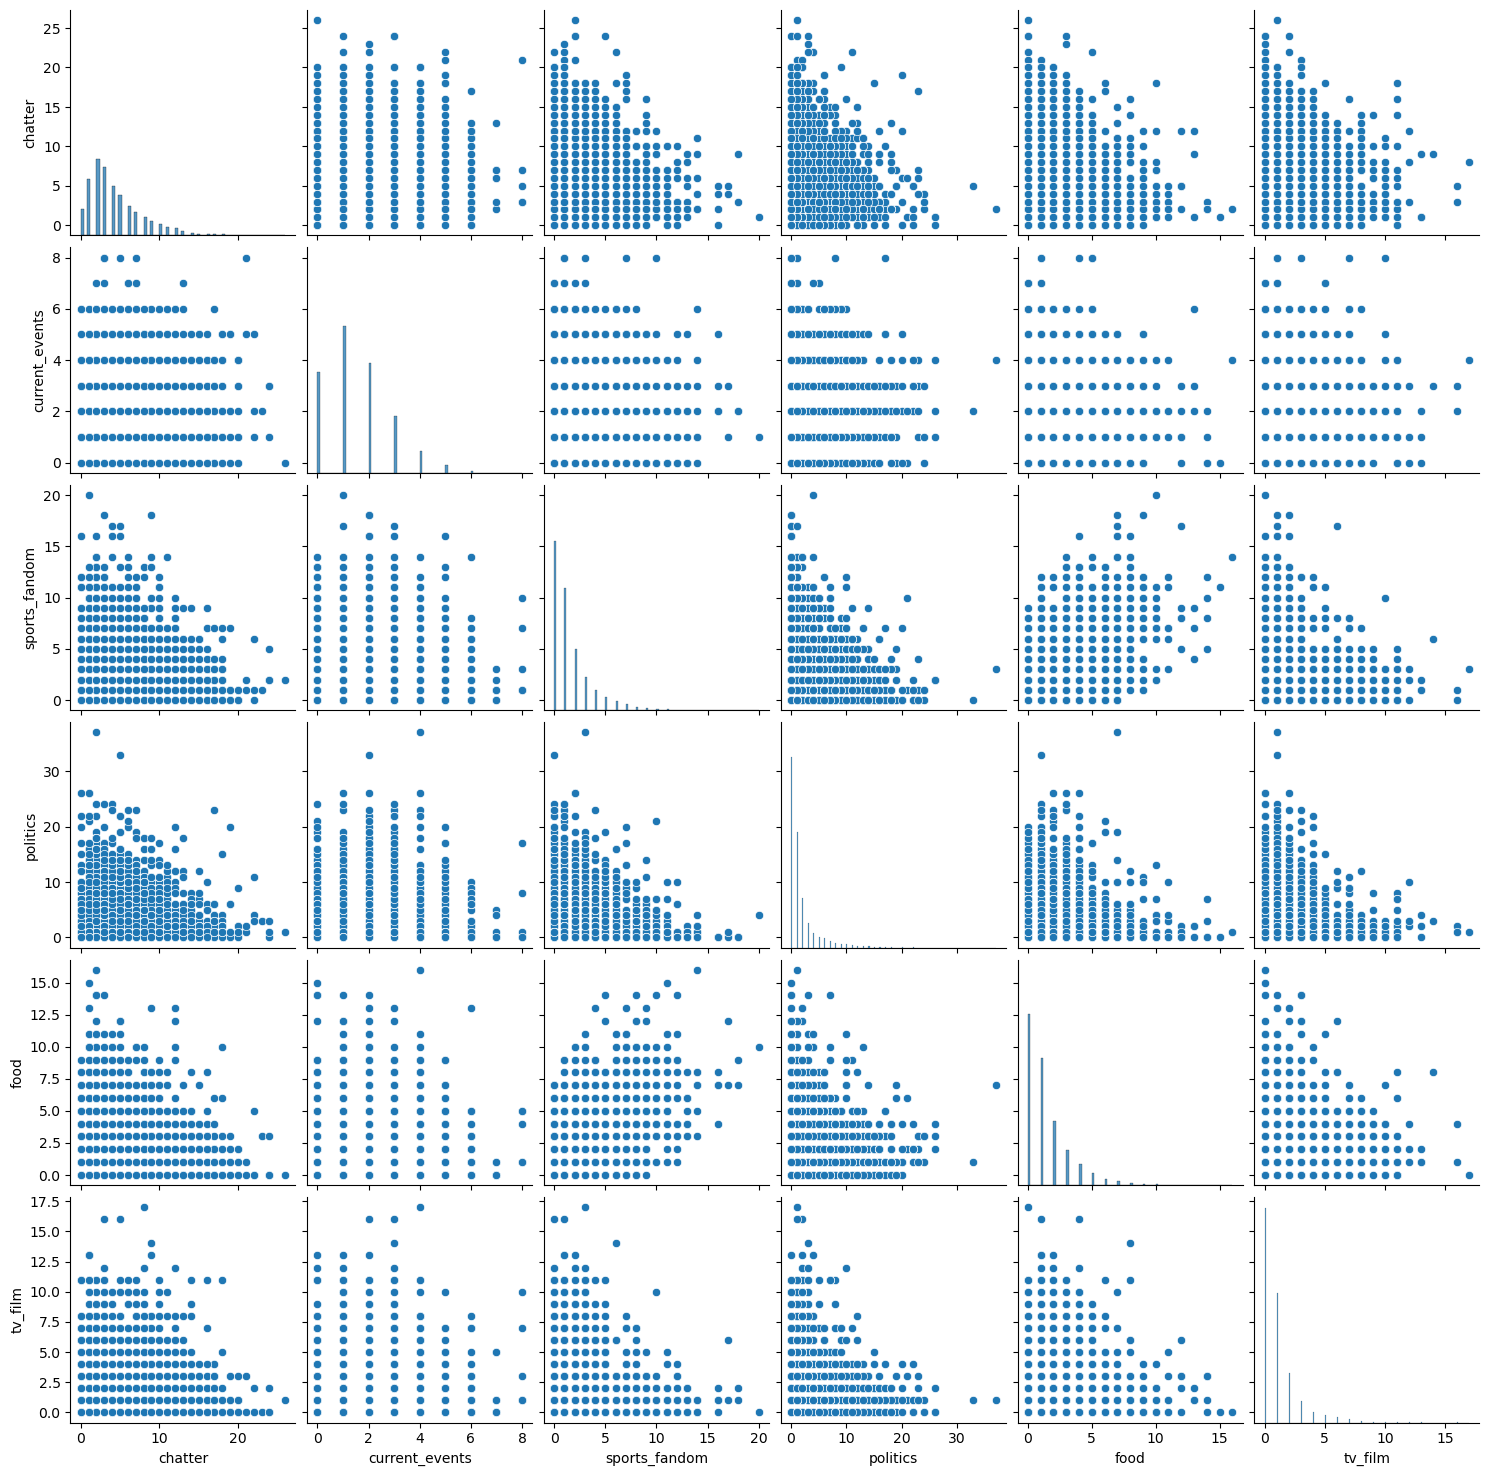

In [234]:
# Basic pairplot to observe relationships (plotting a few categories to keep it manageable)
sns.pairplot(df_clean[['chatter', 'current_events', 'sports_fandom', 'politics', 'food', 'tv_film']])
plt.show()


In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [238]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [240]:
# Reducing dimensions for visualization purposes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [242]:
# Clustering with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [244]:
# Adding PCA and cluster results back to the dataframe
df_clean['PCA1'] = pca_result[:, 0]
df_clean['PCA2'] = pca_result[:, 1]
df_clean['Cluster'] = clusters

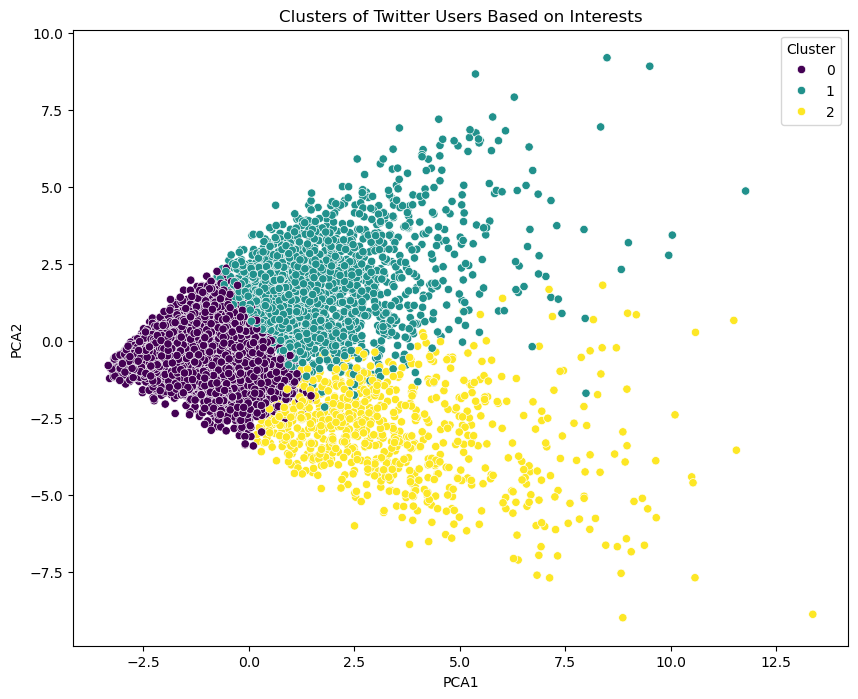

In [246]:
# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clean, palette='viridis')
plt.title('Clusters of Twitter Users Based on Interests')
plt.show()

This scatter plot shows the results of clustering Twitter users based on their interests, visualized using Principal Component Analysis (PCA) to reduce the data to two dimensions. Three distinct clusters are identified:

1. **Cluster 0 (Purple):** Users in this group have similar interests, tightly grouped together.
2. **Cluster 1 (Teal):** This cluster is more spread out, indicating users with diverse interests.
3. **Cluster 2 (Yellow):** These users are more dispersed, suggesting different interests compared to the other clusters.

The clusters help identify groups of users with similar interest profiles, useful for targeted marketing or content recommendations.

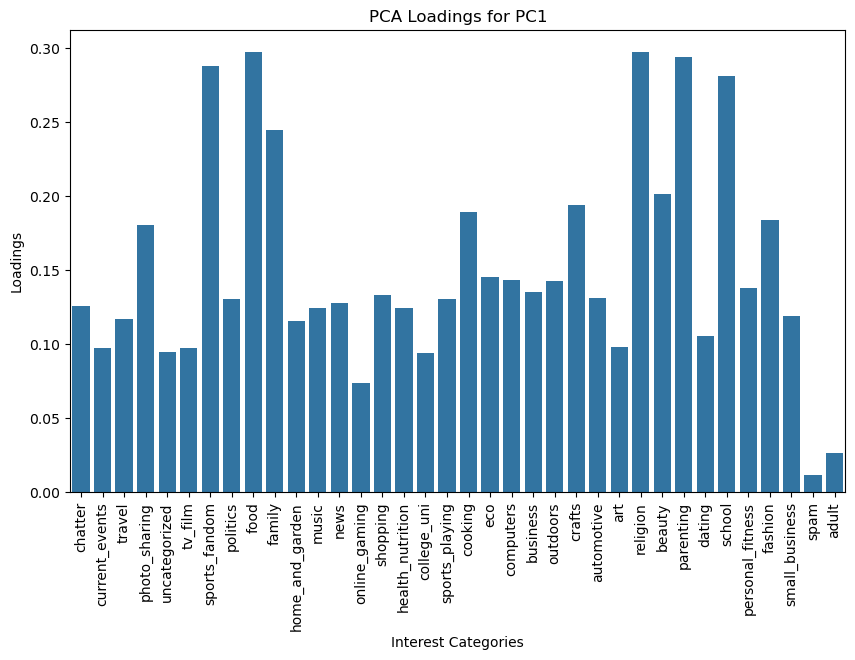

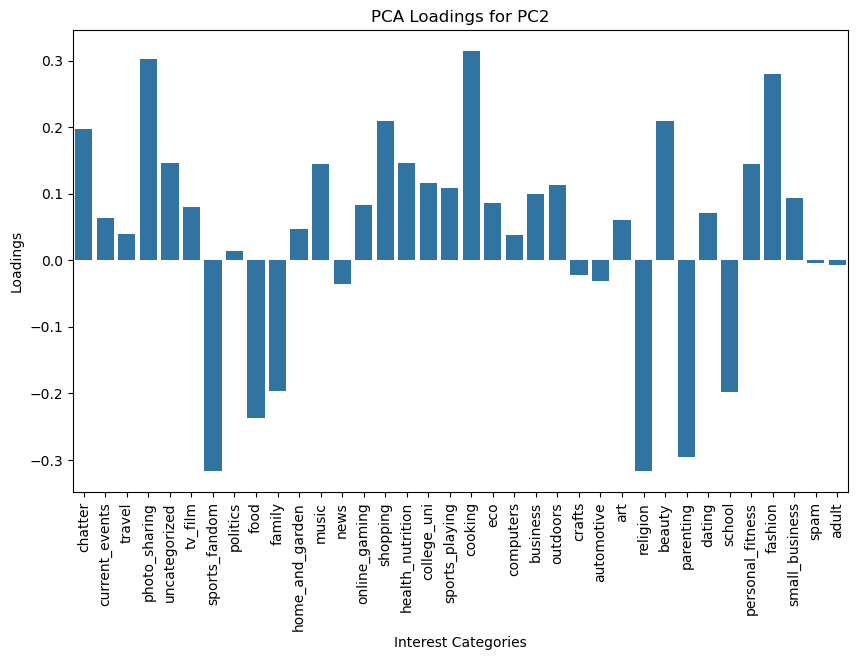

In [249]:
# Create a DataFrame for PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_clean.columns[:-3])  # Exclude 'PCA1', 'PCA2', 'Cluster'

# Plot the loadings for PC1
plt.figure(figsize=(10, 6))
sns.barplot(x=loadings.index, y=loadings['PC1'])
plt.xticks(rotation=90)
plt.title('PCA Loadings for PC1')
plt.xlabel('Interest Categories')
plt.ylabel('Loadings')
plt.show()

# Plot the loadings for PC2
plt.figure(figsize=(10, 6))
sns.barplot(x=loadings.index, y=loadings['PC2'])
plt.xticks(rotation=90)
plt.title('PCA Loadings for PC2')
plt.xlabel('Interest Categories')
plt.ylabel('Loadings')
plt.show()

Cluster
0    1.364725
1    2.875701
2    1.496933
Name: politics, dtype: float64


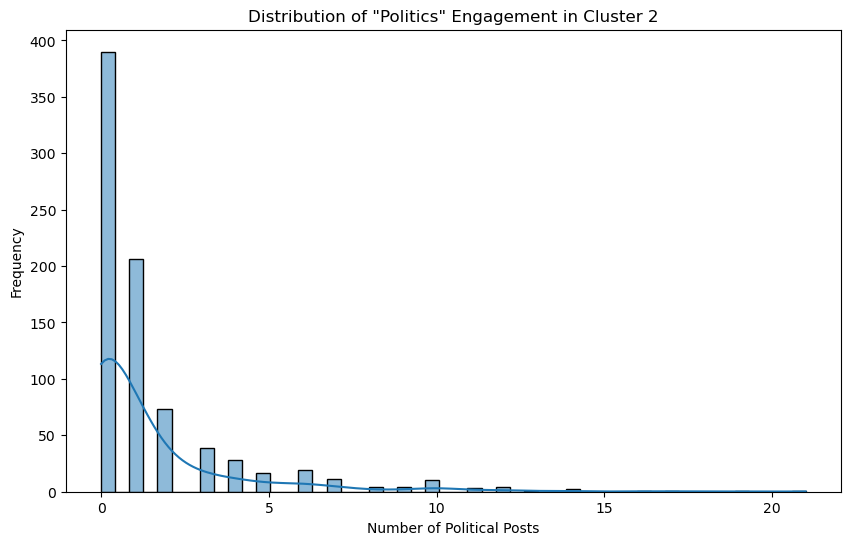

In [129]:
# Calculate the mean engagement in "politics" for each cluster
politics_mean_by_cluster = df_clean.groupby('Cluster')['politics'].mean()

# Display the mean engagement for "politics" by cluster
print(politics_mean_by_cluster)

# Visualizing the distribution of "politics" engagement within the identified cluster (Cluster 2 in this example)
cluster_of_interest = 2  # Replace with the correct cluster number if different

plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['Cluster'] == cluster_of_interest]['politics'], kde=True)
plt.title(f'Distribution of "Politics" Engagement in Cluster {cluster_of_interest}')
plt.xlabel('Number of Political Posts')
plt.ylabel('Frequency')
plt.show()

/var/folders/f_/761zdxqd4xj6cs5ww2w054x40000gn/T/ipykernel_42428/1189253658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=politics_mean_by_cluster.index, y=politics_mean_by_cluster.values, palette='viridis')


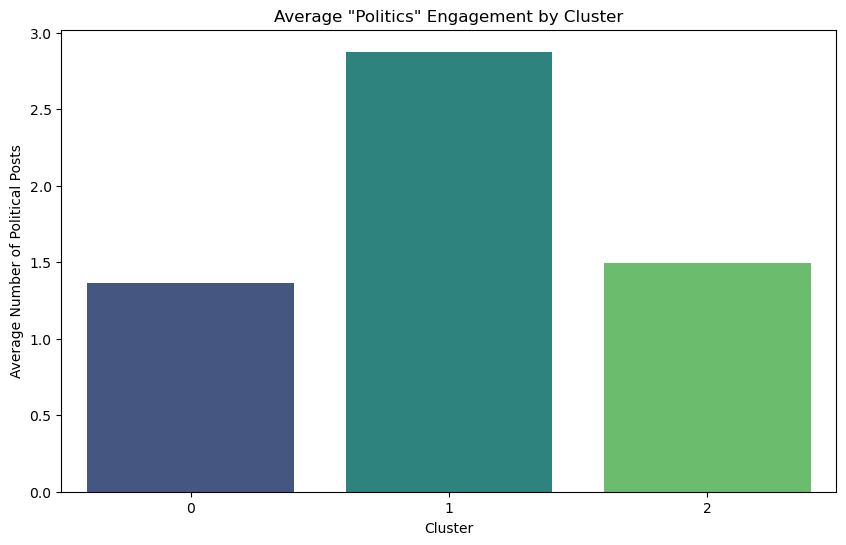

In [131]:
# Comparing the average "politics" engagement across all clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=politics_mean_by_cluster.index, y=politics_mean_by_cluster.values, palette='viridis')
plt.title('Average "Politics" Engagement by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Political Posts')
plt.show()

This bar chart illustrates the average engagement with political posts across three clusters of Twitter users. Here's a brief summary:

* Cluster 0: Users in this cluster have a lower average engagement with political posts, with around 1.5 posts on average.
* Cluster 1: This cluster has the highest average engagement, with users posting nearly 3 political posts on average.
* Cluster 2: Engagement is moderate in this cluster, with users averaging around 1.5 political posts.
The chart indicates that users in Cluster 1 are significantly more engaged with political content compared to those in Clusters 0 and 2.

In [252]:
# Select the cluster of interest
cluster_of_interest = 2  # Replace with the correct cluster number if different

# Filter the data for the specific cluster
cluster_data = df_clean[df_clean['Cluster'] == cluster_of_interest]

# Summary statistics for each column within the cluster
summary_stats = cluster_data.describe().T[['mean', '50%', 'std', 'min', 'max']]

# Rename the '50%' column to 'median'
summary_stats.rename(columns={'50%': 'median'}, inplace=True)

# Add a column for skewness to understand the shape of the distribution
summary_stats['skewness'] = cluster_data.skew()

# Display the summary statistics for the cluster
summary_stats

mean    median       std       min        max   skewness
chatter           4.087117  3.000000  3.351778  0.000000  24.000000   1.596422
current_events    1.700613  1.000000  1.349743  0.000000   8.000000   0.955480
travel            1.536196  1.000000  2.158545  0.000000  18.000000   3.290788
photo_sharing     2.509202  2.000000  2.451415  0.000000  18.000000   1.638074
uncategorized     0.738650  1.000000  0.875080  0.000000   5.000000   1.228154
tv_film           1.036810  1.000000  1.575650  0.000000  14.000000   2.885897
sports_fandom     5.858896  5.000000  2.985792  0.000000  20.000000   1.025776
politics          1.496933  1.000000  2.610163  0.000000  21.000000   3.094330
food              4.559509  4.000000  2.482089  0.000000  16.000000   1.045331
family            2.469939  2.000000  1.675453  0.000000  10.000000   0.804121
home_and_garden   0.666258  0.000000  0.824399  0.000000   4.000000   1.042291
music             0.722699  0.000000  0.968376  0.000000   7.000000   1.790665
news              1.202454  1.000000  2.006621  0.000000  14.000000   2.796257
online_gaming     1.278528  1.000000  2.677088  0.000000  22.000000   4.102572
shopping          1.374233  1.000000  1.757000  0.000000  12.000000   1.902499
health_nutrition  2.166871  1.000000  3.806968  0.000000  31.000000   2.859896
college_uni       1.452761  1.000000  2.709509  0.000000  23.000000   3.802003
sports_playing    0.757055  0.000000  1.015783  0.000000   7.000000   2.044314
cooking           1.716564  1.000000  2.692588  0.000000  19.000000   2.853988
eco               0.653988  0.000000  0.865972  0.000000   5.000000   1.413591
computers         0.822086  1.000000  1.168381  0.000000  10.000000   2.795634
business          0.514110  0.000000  0.741527  0.000000   4.000000   1.491845
outdoors          0.752147  0.000000  1.044427  0.000000   8.000000   2.000462
crafts            1.068712  1.000000  1.153007  0.000000   7.000000   1.210497
automotive        1.069939  1.000000  1.395418  0.000000  11.000000   2.425822
art               0.871166  0.000000  1.594475  0.000000  12.000000   3.589292
religion          5.285890  5.000000  2.695065  0.000000  20.000000   0.987664
beauty            1.092025  1.000000  1.252074  0.000000   8.000000   1.689037
parenting         4.013497  4.000000  2.265772  0.000000  14.000000   0.904363
dating            0.666258  0.000000  1.611240  0.000000  16.000000   5.084599
school            2.669939  2.000000  1.786591  0.000000  11.000000   0.847202
personal_fitness  1.379141  1.000000  2.188266  0.000000  19.000000   2.974533
fashion           1.026994  1.000000  1.490101  0.000000  10.000000   2.510830
small_business    0.387730  0.000000  0.616598  0.000000   5.000000   1.757314
spam              0.006135  0.000000  0.078133  0.000000   1.000000  12.672691
adult             0.401227  0.000000  1.812392  0.000000  17.000000   5.763239
PCA1              3.411772  2.934274  2.189927  0.187329  13.365095   1.090925
PCA2             -2.913432 -2.778456  1.536916 -8.982140   1.808267  -0.368693
Cluster           2.000000  2.000000  0.000000  2.000000   2.000000   0.000000

          chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        3.600974        1.360869  1.257154       1.846560       0.665111   
1        6.354206        1.840654  2.358411       4.725701       1.181776   
2        4.087117        1.700613  1.536196       2.509202       0.738650   

          tv_film  sports_fandom  politics      food    family  ...  religion  \
Cluster                                                         ...             
0        0.816115       0.990258  1.364725  0.816521  0.569515  ...  0.516339   
1        1.668224       1.359813  2.875701  1.530841  0.929907  ...  0.832710   
2        1.036810       5.858896  1.496933  4.559509  2.469939  ...  5.285890   

           beauty  parenting    dating    school  personal_fitness   fashion  \
Cluster                                                                        
0        0.334078   0.464989  0.435762  0.406129

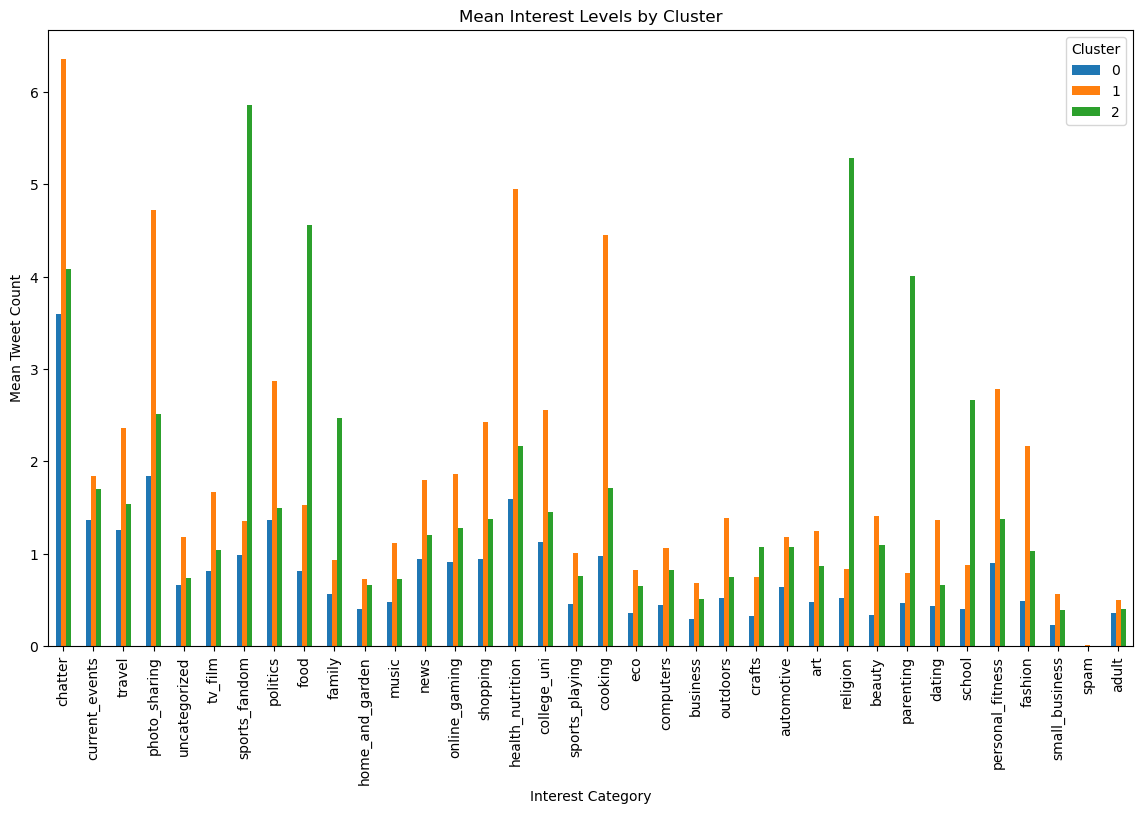

In [135]:
# Calculate the mean of each interest category for each cluster
cluster_means = df_clean.groupby('Cluster').mean()

# Drop the PCA components as we are interested in the original features
cluster_means = cluster_means.drop(columns=['PCA1', 'PCA2'])

# Display the cluster means
print(cluster_means)

# Plot the mean values to visualize the differences
cluster_means.T.plot(kind='bar', figsize=(14, 8), title="Mean Interest Levels by Cluster")
plt.ylabel("Mean Tweet Count")
plt.xlabel("Interest Category")
plt.show()

This bar chart compares the mean tweet counts across various interest categories for three clusters of Twitter users. Here’s a brief overview:

1. **Cluster Differences:** The chart shows how users in each cluster engage differently across a wide range of interest categories. Each bar represents the average number of tweets in that category for the cluster, with different colors for each cluster (Cluster 0: Blue, Cluster 1: Orange, Cluster 2: Green).

2. **Cluster 1 (Orange):** This cluster consistently shows higher engagement across many categories, such as "chatter," "politics," "current_events," and "sports_fandom," indicating that users in this cluster are more active in a variety of topics.

3. **Cluster 2 (Green):** This cluster exhibits significant engagement in categories like "health_nutrition," "eco," and "personal_fitness," suggesting a focus on wellness and environmental topics.

4. **Cluster 0 (Blue):** This cluster has generally lower engagement across most categories but shows moderate activity in areas like "photo_sharing" and "cooking."

This chart helps identify which topics are most popular within each user cluster, aiding in targeted content strategies and user segmentation.

***
***
# <font color='orange'> Clustering and Dimensionality Reduction </font>
***
***

In [ ]:
# Read csv file into pandas
wine_df = pd.read_csv('wine.csv')

In [79]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/dpuelz/STA380/master/data/wine.csv')

Removing last two colums of the dataframe (color and quality) as we want to understand if we can build an unsupervised learning model to predict our target class

In [97]:
# Selecting all the columns except the last two columns of the dataframe
X = wine_df.iloc[:, :-2]

display(X)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
6492     11.2  
6493      9.6  
6494      9.4  
6495     12.8  
6496     11.8  

[6497 rows x 11 columns]

### K Means Clustering

Let's try using K means clustering technique using all the raw scaled features to split the data into two clusters and observe the two clusters and check if the clustring is able to distinguish between the red and white.


Process :
Scaling the data to the standard scale to feed into the algorithm so that any feature doesn't overpower the distance calculations in the algorithm
Using n_clusters = 2 as our objective is to distinguish between red and white wines

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [99]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
model = KMeans(n_clusters=2, random_state=0, init='random', n_init=20)
wine_df['Cluster'] = model.fit_predict(df_scaled)

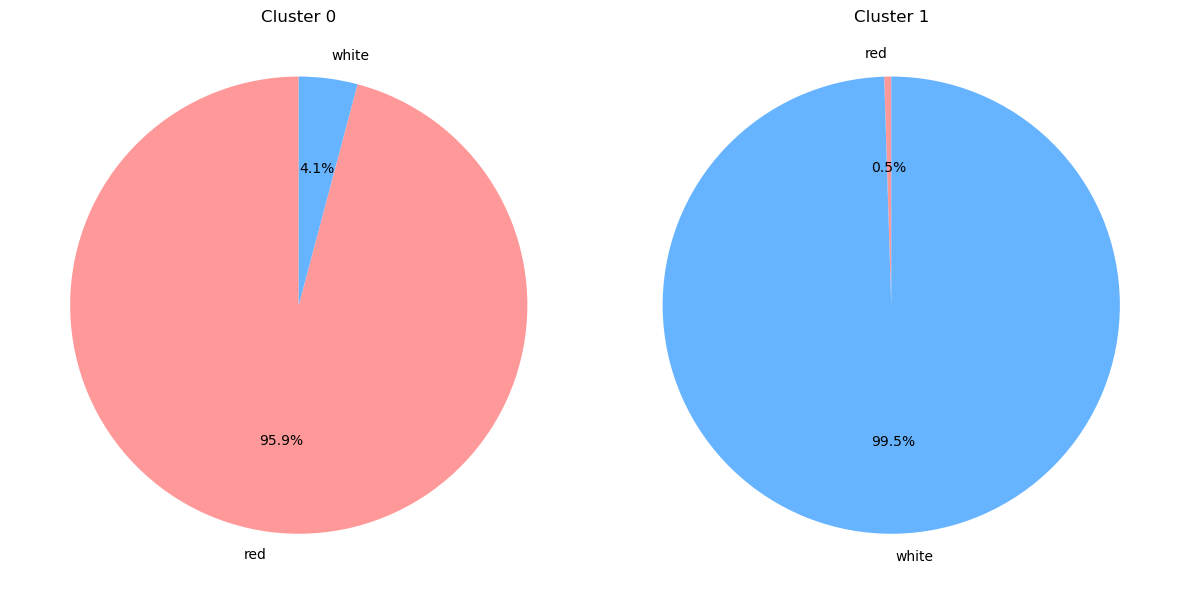

In [101]:
# Grouping by cluster and color to observe how many reds and whites are in each cluster
x = wine_df.groupby(['Cluster','color']).agg(
    num_samples = ('color','count')
).reset_index()

# Plotting both the clusters and it's contents two undersrtand and compare it's performance in terms of how well the colors have been distributed 
# Prepare data for Cluster 0 and Cluster 1
cluster_0 = x[x['Cluster'] == 0]
cluster_1 = x[x['Cluster'] == 1]

# Plotting the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Cluster 0
ax1.pie(cluster_0['num_samples'], labels=cluster_0['color'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax1.set_title('Cluster 0')

# Pie chart for Cluster 1
ax2.pie(cluster_1['num_samples'], labels=cluster_1['color'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax2.set_title('Cluster 1')


ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.show()

From the above pie charts we can confirm that K-means clustering on the dataset using all the raw features is providing a good result
* cluster 0 : ~96% red
* cluster 1 : ~100% white

We can conclude that K-means clustering technique is capable to distinguish between the red and white wines

### PCA

* Let us apply PCA on our dataset to reduce the dimensions and try to cluster on PCs and observe the clusters performance using the K-means clustering technique
* Using the PCA technique to bring down the feature space to two PCs and plot the data points over these two PCs to observe the spread of data

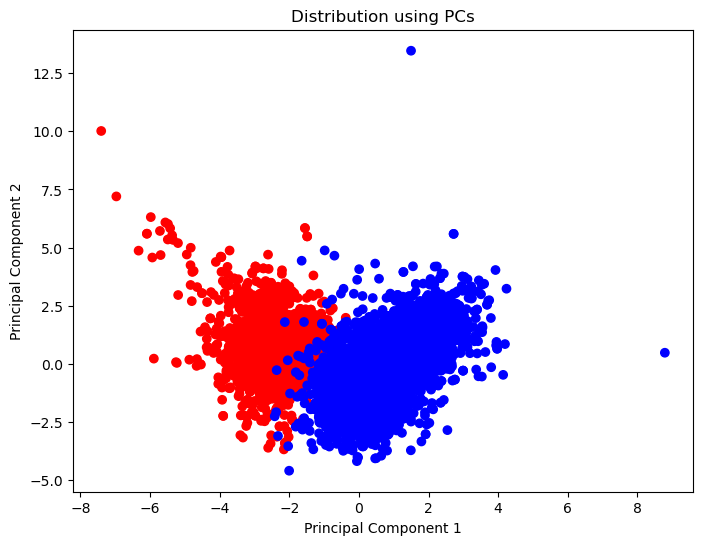

Explained variance by each component: [0.2754426  0.22671146]


In [114]:
from sklearn.decomposition import PCA

# Run PCA algorithm
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['Y'] = wine_df['color']
pca_df['Y_2'] = pca_df['Y'].apply(lambda x : "red" if x == "red" else "blue")


# Plot the PCA results with colors 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Y_2'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Distribution using PCs')
plt.show()

# Explained Variance by the PCA
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

* From the above chart of PCA 1 vs PCA 2 we can see that there are two clear clusters of (Red and White Wine) present but there's an overlap at the region (-2 and -1) on x - axis
* Total cumulative explained variance observed is ~0.5 
* Let's run a K-means(k=2) clusters using the 2 PCAs to identify these clusters and then compare the quality of clusetrs using the original y variable

### Run K Means Using 2 PCA Components

In [122]:
# Run K means Clustering 
model = KMeans(n_clusters=2, random_state=0)
pca_df['Cluster'] = model.fit_predict(pca_df.iloc[:, :-2])

In [124]:
# Grouping on color and the original Y color variable to see the clusters contents
x = pca_df.groupby(['Cluster','Y']).agg(
    num_samples = ('Y','count')
).reset_index()

x

Cluster      Y  num_samples
0        0    red         1582
1        0  white         2511
2        1    red           17
3        1  white         2387

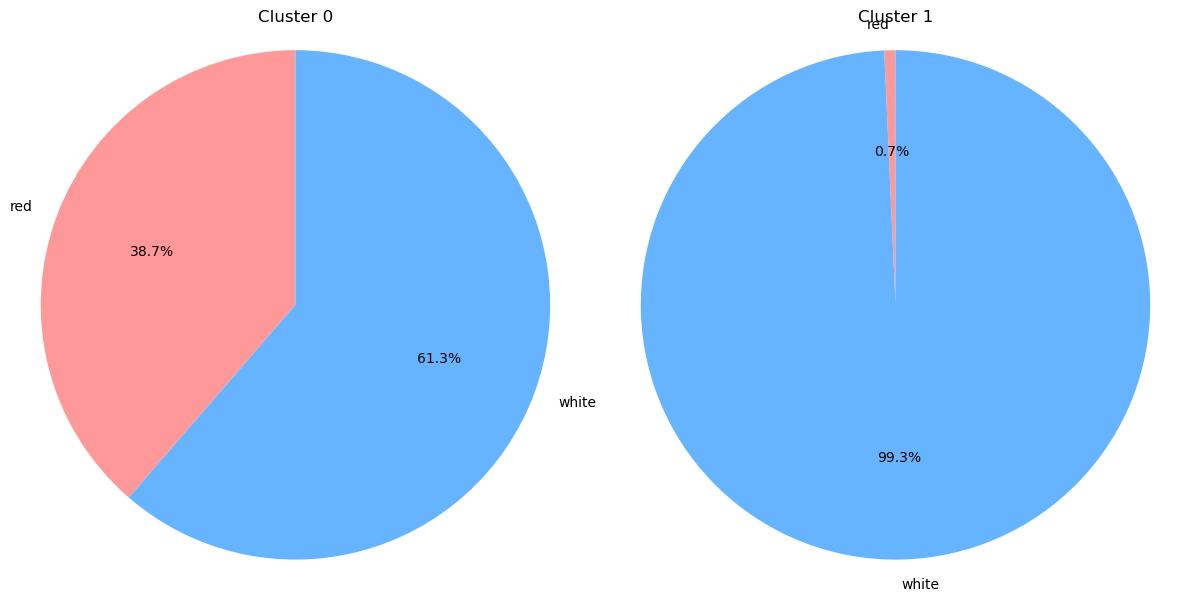

In [126]:
# Plotting the two clusters and their datapoints color 
# Prepare data for Cluster 0 and Cluster 1
cluster_0 = x[x['Cluster'] == 0]
cluster_1 = x[x['Cluster'] == 1]

# Plotting the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Cluster 0
ax1.pie(cluster_0['num_samples'], labels=cluster_0['Y'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax1.set_title('Cluster 0')

# Pie chart for Cluster 1
ax2.pie(cluster_1['num_samples'], labels=cluster_1['Y'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax2.set_title('Cluster 1')


ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.show()

* From the above charts we can observe that we didn't get a clear distinct clusters like the ones using all the raw features of the data
* cluster 0 contains 40% red and 60% white and cluster 1 has 99% whites 
* we can confirm from the above chart Running a K-means using 2 PCAs doesn't seem to perform well to distingusih the wines based on their color

##### As 2 PCAs are not not enough for our dataset to create distinct clusters, let us try to find the optimal PCs to better performance 
##### Let's use the cummulative explained variance to select an optimal number of PC and cluster using those PCs

### Optimal number of components

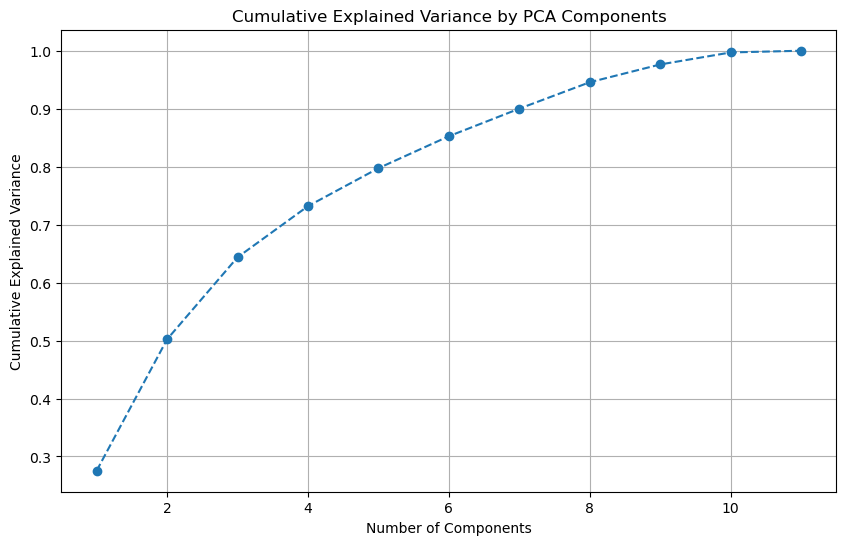

Optimal number of components to retain 90.0% variance: 7


In [136]:
# PCA without specifying number of components
pca = PCA()
pca.fit(df_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Choose the number of components that explain a desired amount of variance
explained_variance_threshold = 0.90  
optimal_components = next(i for i, total in enumerate(explained_variance.cumsum()) if total >= explained_variance_threshold) + 1

print(f'Optimal number of components to retain {explained_variance_threshold*100}% variance: {optimal_components}')


* considering an explained variance threshold of 0.9, we can see from the above graph using 7 PCs would provide 0.9 explained variance
* Let's Run K-means using 7 PCs

#### Run 7 component PCA and K-means using these 7 PCs

In [142]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=7) 
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC_1', 'PC_2','PC_3','PC_4','PC_5','PC_6','PC_7'])

pca_df['Y'] = wine_df['color']

# Explained Variance by the PCA
explained_variance = pca.explained_variance_ratio_
exp_sum = sum(explained_variance)
print(f'Total Explained variance by all components: {round(exp_sum*100,2)} %')

Total Explained variance by all components: 90.01 %


In [144]:
# K Means using 7 PCA Components
model = KMeans(n_clusters=2, random_state=0, init='random', n_init=20)
pca_df['Cluster'] = model.fit_predict(pca_df.iloc[:, :-2])

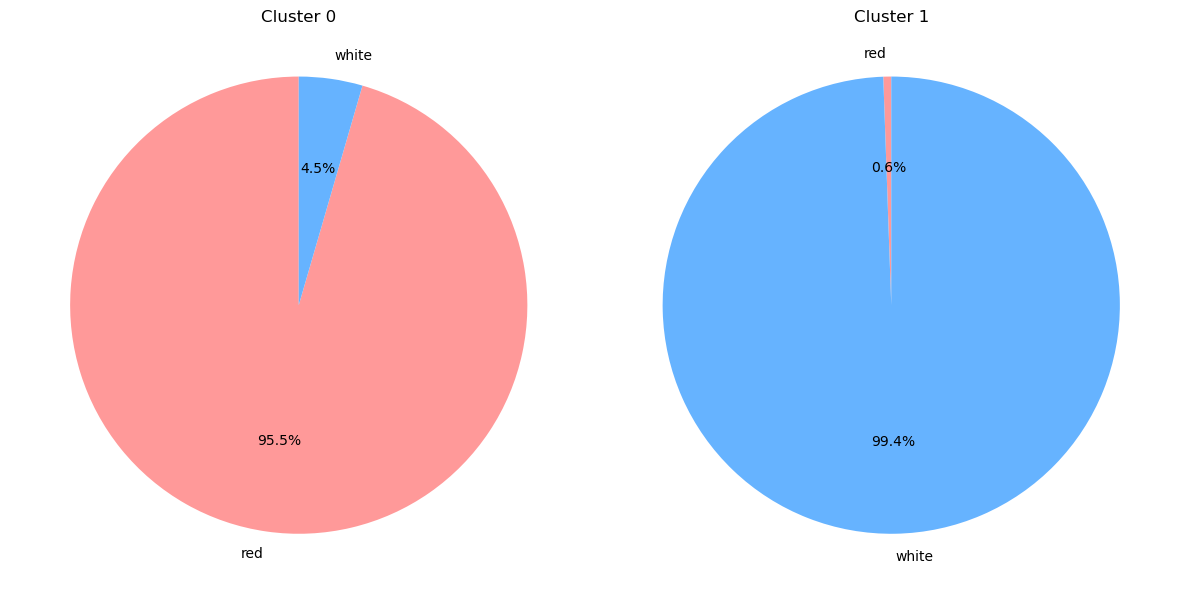

In [146]:
# Plotting the two clusters and their datapoints color 
# Prepare data for Cluster 0 and Cluster 1

x = pca_df.groupby(['Cluster','Y']).agg(
    num_samples = ('Y','count')
).reset_index()


cluster_0 = x[x['Cluster'] == 0]
cluster_1 = x[x['Cluster'] == 1]

# Plotting the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Cluster 0
ax1.pie(cluster_0['num_samples'], labels=cluster_0['Y'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax1.set_title('Cluster 0')

# Pie chart for Cluster 1
ax2.pie(cluster_1['num_samples'], labels=cluster_1['Y'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax2.set_title('Cluster 1')


ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.show()

* Using 7 PCs with K-means is providing very good results very similiar to the results we got while using all the raw data features
* Cluster 0 is 96% red
* Cluster 1 is 99.5% white

* For this dataset we're able to achieve similar results using 7 PCs as with using all the raw variables

### t-SNE

#### Let's try using t-SNE algorithm and reduce the dataset to two dimensions and cluster using these dimensions 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


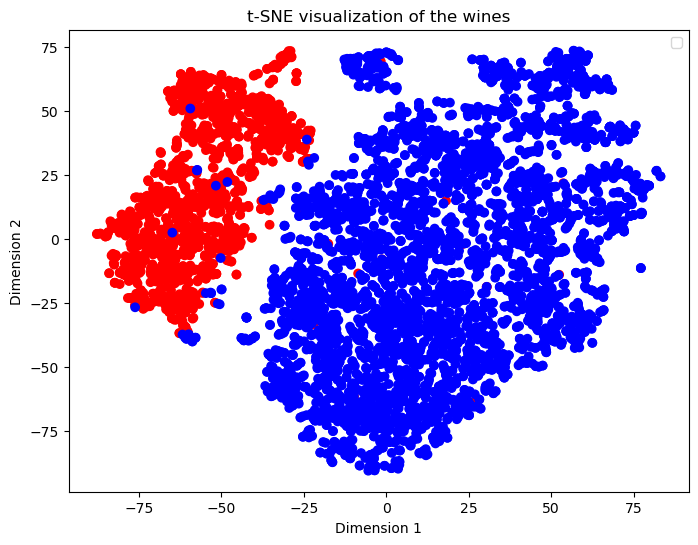

In [157]:
# Create a t-SNE model and fit it to the data
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['label'] = wine_df['color']
df_tsne['label'] = df_tsne['label'].apply(lambda x : "red" if x == "red" else "blue")

# Plotting the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['label'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=['red','blue'])
plt.title('t-SNE visualization of the wines')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [159]:
# Feeding the tsne derived dimensions to Kmeans to cluster 
model = KMeans(n_clusters=2, random_state=0, n_init=40)
df_tsne['Cluster'] = model.fit_predict(df_tsne.iloc[:, :-1])

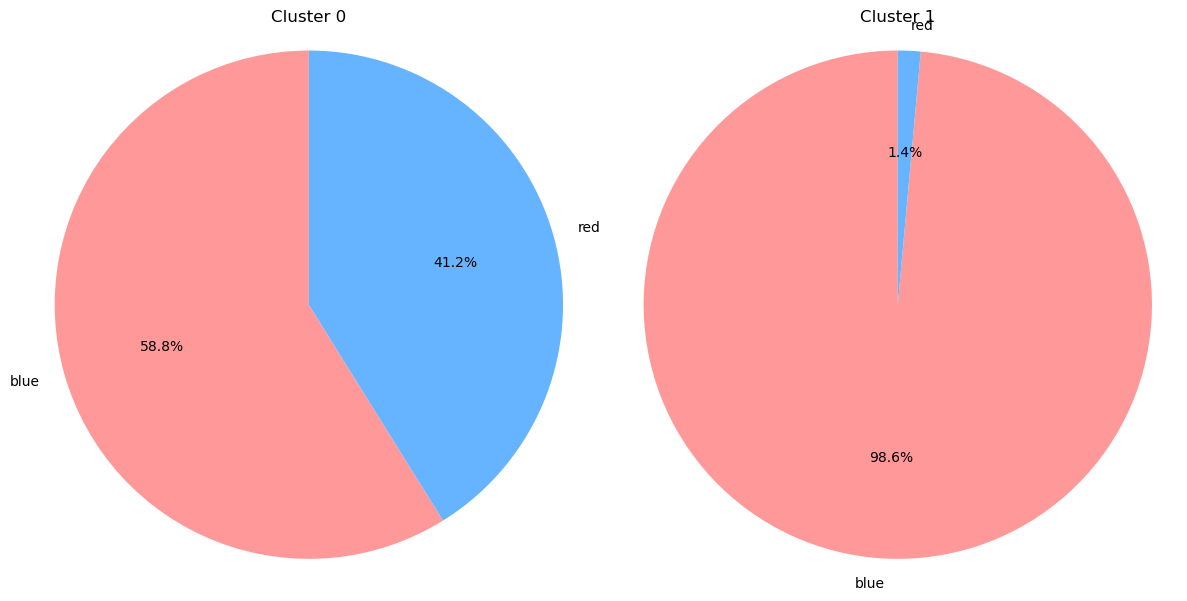

In [161]:
x = df_tsne.groupby(['Cluster','label']).agg(num_samples = ('label','count')).reset_index()

# Plotting the two clusters and their datapoints color 
# Prepare data for Cluster 0 and Cluster 1
cluster_0 = x[x['Cluster'] == 0]
cluster_1 = x[x['Cluster'] == 1]

# Plotting the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Cluster 0
ax1.pie(cluster_0['num_samples'], labels=cluster_0['label'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax1.set_title('Cluster 0')

# Pie chart for Cluster 1
ax2.pie(cluster_1['num_samples'], labels=cluster_1['label'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax2.set_title('Cluster 1')


ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.show()

* From the above results we can see that Clustering using t-sne is not providing very good results compare to PCA method
* t-sne using 3 dimensions is also providing similar results to t-sne with 2 dimensions

### Understanding if K-means will help in classsifying wines based on qualtiy

* Let's use all the raw data features to split into 10 clusters for each point on quality scale (1-10) and visualize them to understand of K-means is capable of clustering the wines based on the quality of wines

In [168]:
# Step 2: Apply K-Means clustering
model = KMeans(n_clusters=10, random_state=0, init='random', n_init=20)
wine_df['Cluster'] = model.fit_predict(df_scaled)


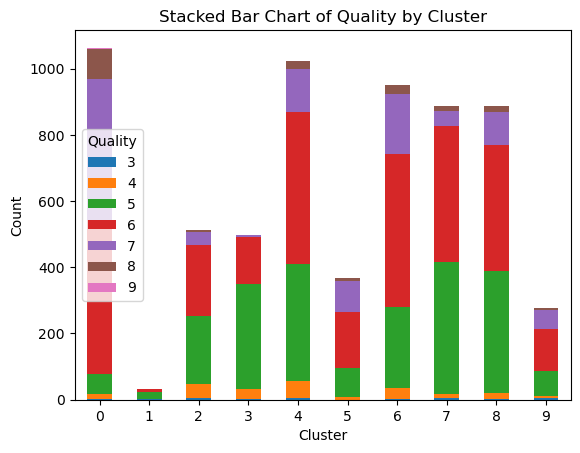

In [170]:
x = wine_df.groupby(['Cluster','quality']).agg(num_samp = ('quality','count')).reset_index()

# Pivot the dataframe to have qualities as columns and counts as values
df_pivot = x.pivot(index='Cluster', columns='quality', values='num_samp')

# Plotting
df_pivot.plot(kind='bar', stacked=True)

# Customizing the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Quality by Cluster')
plt.xticks(rotation=0)
plt.legend(title='Quality')

# Show the plot
plt.show() 

* From the above bar chart we can clearly see clusters have a very high overlap based on qualities; almost all the qualities are present in all the clusters
* We can confirm that K-means algorithm is not capable of a accurate clustering based on qualties with our dataset

#### In Conclusion, we can state that differences in color of the wine (but not quality) emerge naturally from applying an unsupervised technique like K-means and PCA to the chemical properties of the wine

****
****
# <font color='orange'> Image Classification with Neural Networks </font>
****
****

### Loading and Preparing the Dataset
We'll use PyTorch's ImageFolder class, which is ideal for datasets structured with directories named after their labels.
Apply data transformations, including normalization and resizing, to ensure consistency.
Split the data into training and test sets (80/20 split).

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64 pixels
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the images
])

# Load the dataset
dataset = ImageFolder(root='EuroSAT_RGB', transform=transform)

# Split the dataset into train and test sets (80/20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

The process involves getting an image dataset ready to train and test a deep learning model with PyTorch. It starts by applying some essential transformations to the images: resizing them to 64x64 pixels, converting them into a format that PyTorch can work with, and normalizing the pixel values. This normalization helps the model learn more effectively by ensuring the data is consistent with what many pre-trained models expect. The dataset, stored in a folder called `EuroSAT_RGB`, is then loaded using PyTorch’s tools.

Once the images are loaded, the dataset is split into two parts—80% for training the model and 20% for testing how well it performs. This split allows for a solid training phase while keeping enough data aside to evaluate the model’s accuracy. To manage the data efficiently, especially when dealing with large datasets, DataLoaders are created. The training DataLoader shuffles the data, which is important because it helps the model learn better by mixing up the order of the images each time. On the other hand, the testing DataLoader keeps the images in their original order to ensure consistency during the model’s evaluation. This setup is a key step in building and testing a model using the EuroSAT dataset.

### Building the Neural Network
We'll define a simple Convolutional Neural Network (CNN) to classify the images.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, len(dataset.classes))

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()


The `SimpleCNN` class defines a basic convolutional neural network (CNN) with three convolutional layers followed by two fully connected layers. It processes input images through a series of convolution, ReLU activation, and max pooling operations, reducing the image size and extracting features, before flattening the data and passing it through fully connected layers for classification. The model is initialized as `model` and is ready for training on the dataset.

### Training the Model
We'll use the cross-entropy loss function and the Adam optimizer to train our model.

In [8]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')


Epoch 1, Loss: 0.9220932862052211
Epoch 2, Loss: 0.5680827577025802
Epoch 3, Loss: 0.43789857180030256
Epoch 4, Loss: 0.3423447146570241
Epoch 5, Loss: 0.27973255522273205
Epoch 6, Loss: 0.22364983219239448
Epoch 7, Loss: 0.17385712434296255
Epoch 8, Loss: 0.12979817684739828
Epoch 9, Loss: 0.10155503212129352
Epoch 10, Loss: 0.09006728036725825


The results of the training loop show that the model is learning well over the course of 10 epochs. The loss, which is a measure of how well the model's predictions match the actual labels, starts at 0.922 in the first epoch and steadily decreases to 0.090 by the tenth epoch. 

This downward trend is a good sign—it means the model is getting better at understanding the data as it trains. Initially, the loss drops quickly, which is typical as the model makes large improvements early on. As the training continues, the improvements become more gradual, indicating that the model is fine-tuning its understanding.

By the end of the training, the low loss value suggests that the model is performing well on the training data, likely making accurate predictions. However, to really know how well the model has learned, it would be important to test it on unseen data to make sure it's not just memorizing the training data but actually generalizing well.

### Evaluating the Model
After training, we'll evaluate the model on the test set and compute the overall accuracy.

In [10]:
correct = 0
total = 0
all_preds = []
all_labels = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.8911


The test accuracy of 89.11% indicates that the model performs well on the test data, suggesting that it has learned to generalize effectively beyond the training set.

### Confusion Matrix and Visualization
We'll create a confusion matrix to analyze the model's performance across different classes and visualize some test images with their predicted labels.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


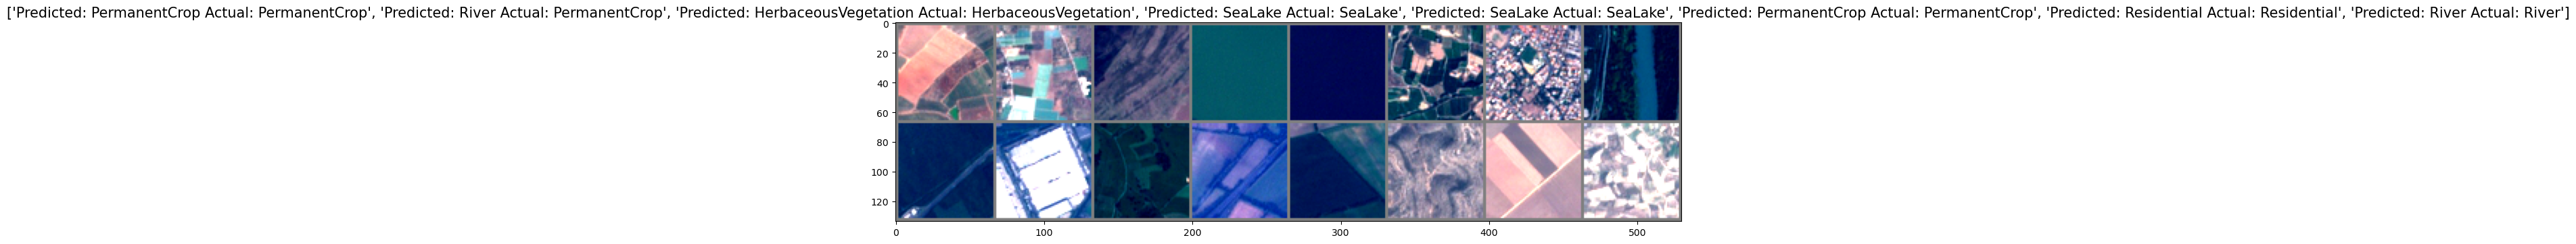

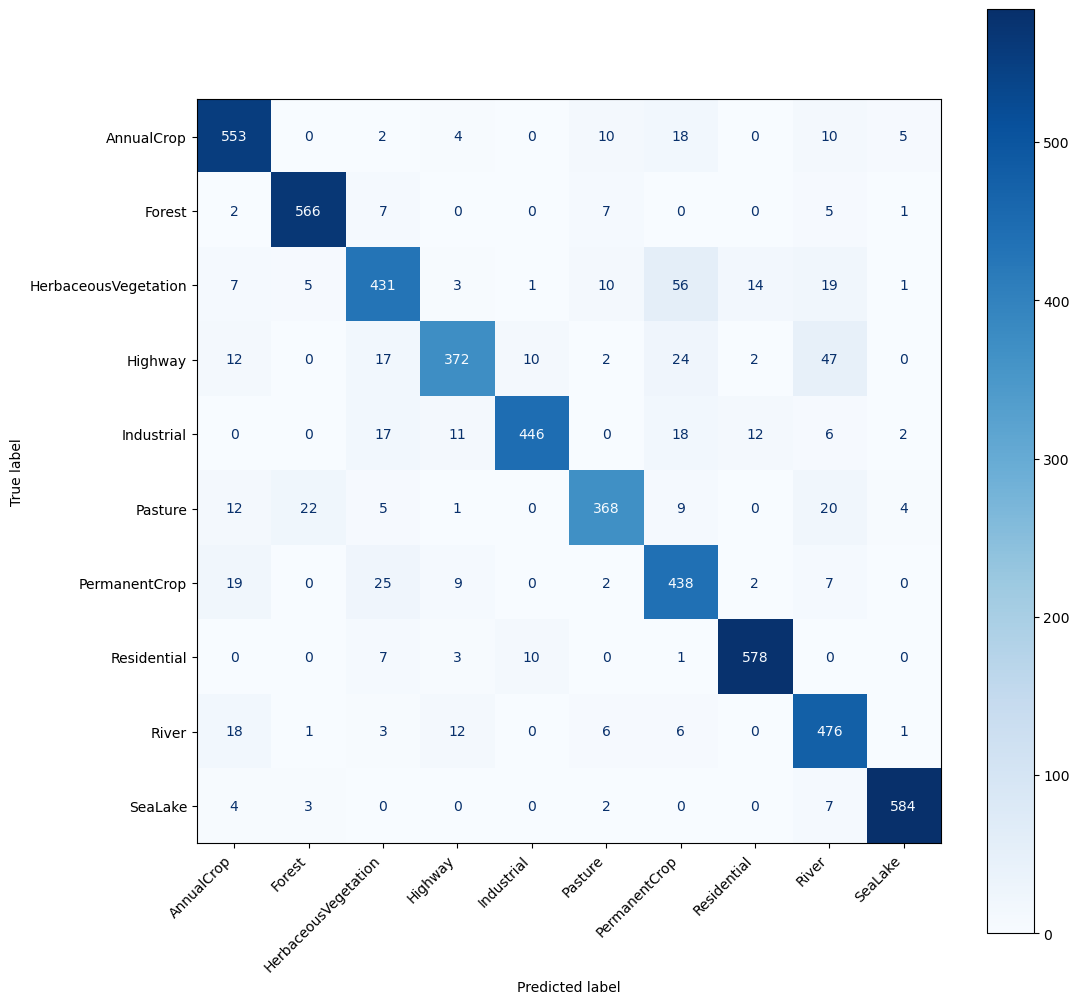

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to display images
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(15, 15))  # Increased figure size to 15x15
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title, fontsize=15)  # Increased font size for better readability
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)


imshow(torchvision.utils.make_grid(images[:16]), 
       title=[f'Predicted: {dataset.classes[p]} Actual: {dataset.classes[l]}' for p, l in zip(predicted[:8], labels[:8])])

# Generate confusion matrix
all_preds = []
all_labels = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)

# Set figure size for the confusion matrix
plt.figure(figsize=(12, 12))  # Increase the size of the confusion matrix plot
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Use current axis with custom size
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()



### 1. Image Grid with Predicted and Actual Labels
- **Correct Predictions:** From the titles above each image, it appears that several predictions are correct. For example, labels like "Predicted: PermanentCrop Actual: PermanentCrop" and "Predicted: River Actual: River" indicate that the model correctly identified these images.
- **Visual Inspection:** The images give a visual sense of the types of land covers the model is working with, such as crops, rivers, residential areas, and more. The correctly predicted images suggest that the model has learned to recognize distinct features of these classes.
- **Potential Errors:** If there were any misclassifications (though it's not immediately clear from the screenshot), you would see discrepancies between the predicted and actual labels. These errors could indicate which classes are visually similar or confusing for the model, which might point to areas where additional training or data augmentation could be beneficial.

### 2. Confusion Matrix Analysis
- **Diagonal Dominance:** The confusion matrix shows a strong diagonal, which is a good sign. The diagonal represents correct predictions—where the predicted class matches the true class. For example:
  - **AnnualCrop:** The model predicted this class correctly 553 times, with very few errors.
  - **SeaLake:** The model also did very well here, with 584 correct predictions.
  - **Residential:** 578 correct predictions indicate strong performance on this class as well.
- **Misclassifications:**
  - **HerbaceousVegetation vs. Pasture:** There is some confusion between these two classes. The model misclassified HerbaceousVegetation as Pasture and vice versa. This suggests that these land covers might have similar features, making them harder to distinguish.
  - **Highway Misclassifications:** The model sometimes confused the Highway class with others like AnnualCrop and Industrial. This could be due to overlapping visual characteristics, such as linear features in crop fields or industrial areas that resemble roads.
  - **PermanentCrop:** There are 19 misclassifications of PermanentCrop as AnnualCrop, and 25 as HerbaceousVegetation, indicating some difficulty in distinguishing these types of vegetation or land cover.
  - **River and SeaLake:** A few images of rivers were misclassified as SeaLakes, which could be due to similar water bodies appearing in both classes.


***
***
# <font color='orange'> Association Rule Mining </font>
***
***

Data Loading: The code reads the grocery data from a text file, where each line represents a shopping basket.


Counting Frequencies: It counts the frequency of each item and the co-occurrence of each pair of items across all baskets.


Calculating Metrics: For each pair of items, the code calculates:
Support: The proportion of transactions that contain both items.
Confidence: The proportion of transactions containing the first item that also contain the second item.
Lift: The ratio of the observed confidence to the expected confidence if the items were independent.


Filtering Rules: The code filters the rules based on the specified confidence (≥0.5) and lift (≥1.2) thresholds.


Sorting and Displaying: The resulting rules are sorted by lift in descending order and displayed.


This approach identifies strong associations between items that frequently appear together in the shopping baskets, making it easier to target specific marketing strategies or product placements.


In [17]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [204]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Read the dataset
file_path = "groceries.txt"
with open(file_path, 'r') as file:
    groceries_raw = file.readlines()

In [21]:
# Print the first few lines of the raw data
print(groceries_raw[:5])


['citrus fruit,semi-finished bread,margarine,ready soups\n', 'tropical fruit,yogurt,coffee\n', 'whole milk\n', 'pip fruit,yogurt,cream cheese ,meat spreads\n', 'other vegetables,whole milk,condensed milk,long life bakery product\n']


In [206]:
# Process the data and convert it into a list of transactions
groceries = [line.strip().split(',') for line in groceries_raw]

In [208]:
# Convert the list of transactions into a DataFrame
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
groceries_df = te.fit(groceries).transform(groceries)
groctrans = pd.DataFrame(groceries_df, columns=te.columns_)

# Display summary information
print(groctrans.sum().sort_values(ascending=False).head(20))
print(f"Number of transactions: {groctrans.shape[0]}")

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
dtype: int64
Number of transactions: 9835


This code converts a list of grocery transactions into a DataFrame where each row represents a transaction and each column represents an item. It uses the `TransactionEncoder` from the `mlxtend` library to transform the transactions into a binary matrix, indicating whether an item was purchased in each transaction. The resulting DataFrame allows you to easily see which items are most frequently bought by summing and sorting the columns. Additionally, it provides the total number of transactions, giving a quick overview of the dataset's size and item popularity.

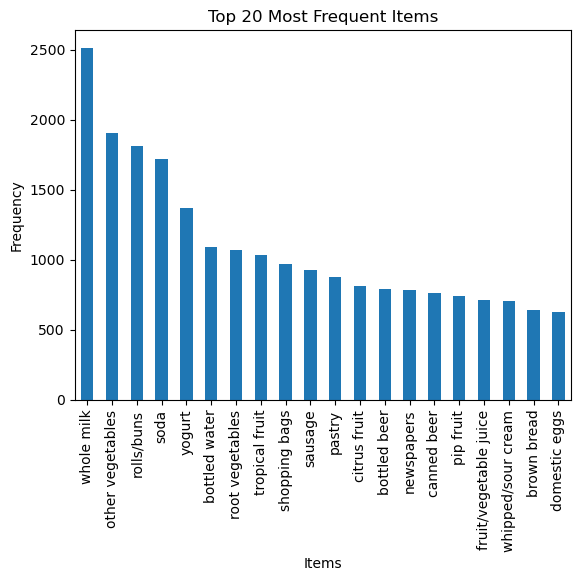

In [210]:
# Plot the top 20 most frequent items
groctrans.sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Items')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

In [212]:
# **Explore rules with support > 0.05, confidence > 0.1 and length <= 2**

# Apply apriori algorithm
frequent_itemsets_1 = apriori(groctrans, min_support=0.05, use_colnames=True)
rules_1 = association_rules(frequent_itemsets_1, metric="confidence", min_threshold=0.1)
rules_1 = rules_1[rules_1['antecedents'].apply(lambda x: len(x) <= 2)]

# Display the rules
rules_1

antecedents         consequents  antecedent support  \
0  (other vegetables)        (whole milk)            0.193493   
1        (whole milk)  (other vegetables)            0.255516   
2        (whole milk)        (rolls/buns)            0.255516   
3        (rolls/buns)        (whole milk)            0.183935   
4        (whole milk)            (yogurt)            0.255516   
5            (yogurt)        (whole milk)            0.139502   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.255516  0.074835    0.386758  1.513634  0.025394    1.214013   
1            0.193493  0.074835    0.292877  1.513634  0.025394    1.140548   
2            0.183935  0.056634    0.221647  1.205032  0.009636    1.048452   
3            0.255516  0.056634    0.307905  1.205032  0.009636    1.075696   
4            0.139502  0.056024    0.219260  1.571735  0.020379    1.102157   
5            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132   

   zhangs_metric  
0       0.420750  
1       0.455803  
2       0.228543  
3       0.208496  
4       0.488608  
5       0.422732

In [214]:
# **Decrease support to > 0.02 and increase confidence to > 0.2**

frequent_itemsets_2 = apriori(groctrans, min_support=0.02, use_colnames=True)
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.2)
rules_2 = rules_2[rules_2['antecedents'].apply(lambda x: len(x) <= 2)]

# Display the rules
rules_2

antecedents                     consequents  \
0                           (beef)                    (whole milk)   
1                   (bottled beer)                    (whole milk)   
2                  (bottled water)              (other vegetables)   
3                  (bottled water)                    (rolls/buns)   
4                  (bottled water)                          (soda)   
..                             ...                             ...   
68  (other vegetables, whole milk)               (root vegetables)   
69               (root vegetables)  (other vegetables, whole milk)   
70      (other vegetables, yogurt)                    (whole milk)   
71  (other vegetables, whole milk)                        (yogurt)   
72            (yogurt, whole milk)              (other vegetables)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.052466            0.255516  0.021251    0.405039  1.585180   
1             0.080529            0.255516  0.020437    0.253788  0.993237   
2             0.110524            0.193493  0.024809    0.224471  1.160101   
3             0.110524            0.183935  0.024199    0.218951  1.190373   
4             0.110524            0.174377  0.028978    0.262190  1.503577   
..                 ...                 ...       ...         ...       ...   
68            0.074835            0.108998  0.023183    0.309783  2.842082   
69            0.108998            0.074835  0.023183    0.212687  2.842082   
70            0.043416            0.255516  0.022267    0.512881  2.007235   
71            0.074835            0.139502  0.022267    0.297554  2.132979   
72            0.056024            0.193493  0.022267    0.397459  2.054131   

    leverage  conviction  zhangs_metric  
0   0.007845    1.251315       0.389597  
1  -0.000139    0.997684      -0.007351  
2   0.003424    1.039945       0.155154  
3   0.003870    1.044832       0.179800  
4   0.009705    1.119017       0.376535  
..       ...         ...            ...  
68  0.015026    1.290900       0.700572  
69  0.015026    1.175091       0.727435  
70  0.011174    1.528340       0.524577  
71  0.011828    1.225003       0.574138  
72  0.011427    1.338511       0.543633  

[73 rows x 10 columns]

In [216]:
# **Decrease support to > 0.0015 and increase confidence to > 0.8**

frequent_itemsets_3 = apriori(groctrans, min_support=0.0015, use_colnames=True)
rules_3 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.8)
rules_3 = rules_3[rules_3['antecedents'].apply(lambda x: len(x) <= 2)]

# Display the rules
rules_3


antecedents         consequents  antecedent support  \
0   (bottled beer, hamburger meat)        (whole milk)            0.002135   
1         (red/blush wine, liquor)      (bottled beer)            0.002135   
2                   (butter, rice)        (whole milk)            0.001830   
3              (butter milk, pork)  (other vegetables)            0.002135   
4                (yogurt, cereals)        (whole milk)            0.002135   
5           (curd, hamburger meat)        (whole milk)            0.003152   
6           (shopping bags, herbs)  (other vegetables)            0.002339   
7              (herbs, rolls/buns)        (whole milk)            0.003050   
8          (tropical fruit, herbs)        (whole milk)            0.002847   
9                (meat, margarine)  (other vegetables)            0.002034   
10                  (yogurt, rice)  (other vegetables)            0.002339   

    consequent support   support  confidence       lift  leverage  conviction  \
0             0.255516  0.001729    0.809524   3.168192  0.001183    3.908541   
1             0.080529  0.001932    0.904762  11.235269  0.001760    9.654448   
2             0.255516  0.001525    0.833333   3.261374  0.001058    4.466904   
3             0.193493  0.001830    0.857143   4.429848  0.001417    5.645552   
4             0.255516  0.001729    0.809524   3.168192  0.001183    3.908541   
5             0.255516  0.002542    0.806452   3.156169  0.001737    3.846501   
6             0.193493  0.001932    0.826087   4.269346  0.001479    4.637417   
7             0.255516  0.002440    0.800000   3.130919  0.001661    3.722420   
8             0.255516  0.002339    0.821429   3.214783  0.001611    4.169110   
9             0.193493  0.001729    0.850000   4.392932  0.001335    5.376716   
10            0.193493  0.001932    0.826087   4.269346  0.001479    4.637417   

    zhangs_metric  
0        0.685827  
1        0.912944  
2        0.694652  
3        0.775915  
4        0.685827  
5        0.685320  
6        0.767567  
7        0.682687  
8        0.690904  
9        0.773935  
10       0.767567


1. **Initial Rule Mining (Support > 0.05, Confidence > 0.1):**
   - The Apriori algorithm is first applied with a minimum support of 0.05, meaning that any itemset appearing in at least 5% of transactions is considered. The association rules are then generated with a confidence threshold of 0.1, and only those with a maximum of two items in the antecedent (the "if" part of the rule) are kept.

2. **Adjusted Parameters (Support > 0.02, Confidence > 0.2):**
   - The support threshold is lowered to 0.02, expanding the number of itemsets considered, while the confidence requirement is raised to 0.2. This adjustment aims to find rules that may involve less frequent items but are more reliable when they occur.

3. **Further Refinement (Support > 0.0015, Confidence > 0.8):**
   - The support threshold is further reduced to 0.0015, allowing even rarer itemsets to be included. However, the confidence threshold is increased significantly to 0.8, focusing on very strong and reliable associations.


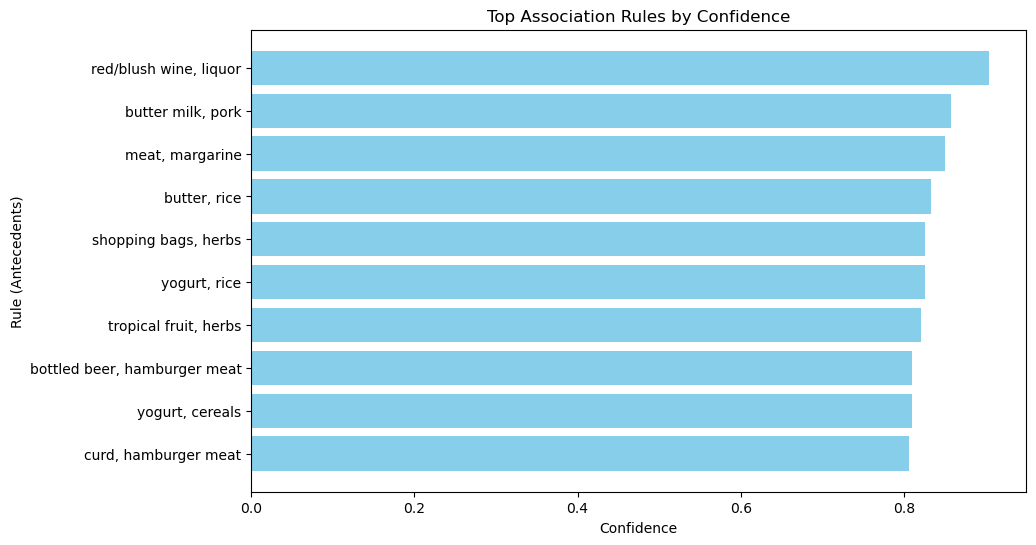

In [61]:

# Sort the rules by confidence to get the top rules
top_rules = rules_3.sort_values(by='confidence', ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['confidence'], color='skyblue')
plt.yticks(range(len(top_rules)), [', '.join(list(rule)) for rule in top_rules['antecedents']])
plt.xlabel('Confidence')
plt.ylabel('Rule (Antecedents)')
plt.title('Top Association Rules by Confidence')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest confidence at the top
plt.show()


This bar chart highlights the top association rules discovered in the dataset, focusing on how likely certain items are to be purchased together. The x-axis represents the confidence level, which shows how often the items in the rule's consequence (the right-hand side) appear in transactions that include the items in the antecedent (the left-hand side). 

For example, the strongest rule in the chart indicates that when customers buy red or blush wine, they are very likely to also buy liquor. Similarly, there's a strong association between buying buttermilk and pork, as well as between meat and margarine. Other interesting pairings include butter with rice and yogurt with cereals, which suggest common combinations in shopping behavior.

These insights can be incredibly valuable for retailers. By understanding which items are frequently bought together, stores can strategically place related products near each other, design more effective promotions, or offer product bundles that align with customer purchasing habits. This chart provides a clear snapshot of consumer behavior, helping businesses make informed decisions to boost sales and improve the shopping experience.

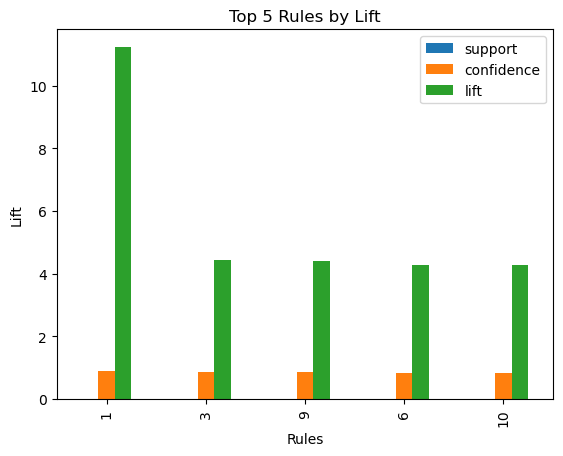

In [35]:
# Plot the top 5 rules by lift for the last set of rules
rules_3.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']].plot(kind='bar')
plt.title('Top 5 Rules by Lift')
plt.xlabel('Rules')
plt.ylabel('Lift')
plt.show()

This chart highlights the top 5 association rules based on their lift values, which measure how much more likely certain items are to be purchased together compared to independently. The green bars represent lift, showing that Rule 1 has an exceptionally strong relationship between its items, much higher than the others. Although the confidence (orange bars) and support (blue bars) for these rules are lower, the high lift suggests that even though these item combinations aren't very common, they are highly significant when they do occur. This kind of insight is valuable for retailers looking to strategically place products together or create targeted promotions based on strong but less frequent purchasing patterns.

***
***
# <font color='orange'> The Reuters Corpus </font>
***
***

### Group articles based on their content contents and analyze author-topic relations.

#### Approach

##### 1. Text Preprocessing: Preprocessing text data by tokenizing, 
##### removing non-alphabetic tokens and stopwords, and lemmatizing the remaining words.

##### 2. TF-IDF Vectorization and PCA: Convert text data into a TF-IDF matrix, apply PCA for dimensionality reduction, 
##### and identify the optimal number of components based on cumulative explained variance.

##### 3. K-Means Clustering: Uses the elbow method and silhouette scores to determine 
##### the optimal number of clusters (k) and then cluster the data accordingly.

##### 4. Cluster Analysis: Visualize clusters, compare cluster distributions between training and test sets, 
##### and identify authors associated with multiple clusters.

##### 5. Topic Modeling: Perform topic modeling on the clustered data using Latent Dirichlet Allocation (LDA) 
##### to describe the main topics within each cluster.

In [1]:
# Importing required packages

import os
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

In [3]:
# Downloading NLTK data packages

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssbid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssbid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssbid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Setting the file paths for the training and testing datasets

train_dir = r'C:\Users\ssbid\Desktop\Summer 2024\Intro to ML (STA S380)\Part 2\Assignment\Reuters C50\C50train'
test_dir = r'C:\Users\ssbid\Desktop\Summer 2024\Intro to ML (STA S380)\Part 2\Assignment\Reuters C50\C50test'

In [7]:
# Defining a function to perform text preprocessing operations (tokenization, stopword removal, lemmatization)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

In [9]:
# Defining a function to load data from the directory and preprocess it

def load_data(directory):
    authors = []
    texts = []
    for author_dir in os.listdir(directory):
        author_path = os.path.join(directory, author_dir)
        if os.path.isdir(author_path):
            for file_name in os.listdir(author_path):
                file_path = os.path.join(author_path, file_name)
                with open(file_path, 'r', encoding='latin1') as file:
                    text = file.read()
                    preprocessed_text = preprocess_text(text)
                    texts.append(preprocessed_text)
                    authors.append(author_dir)
    return pd.DataFrame({'author': authors, 'text': texts})

In [11]:
# Load training and test data

train_df = load_data(train_dir)
test_df = load_data(test_dir)

In [13]:
# Converting the training text data to a TF-IDF matrix
# A TF-IDF matrix represents the importance of a term in a document relative to the entire corpus
# Term Frequency (TF) : Measures how frequently a term appears in a document
# Inverse Document Frequency (IDF) : Measures how important a term is across the entire corpus

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])

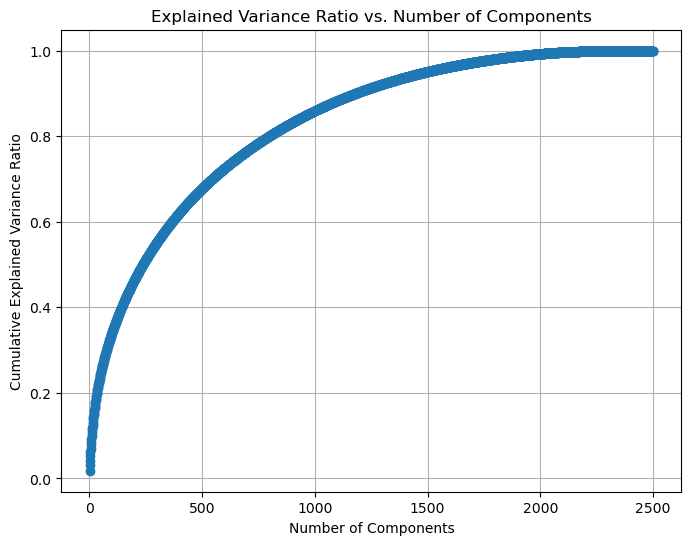

In [15]:
# Fit PCA and plot explained variance ratio to determine the optimal number of components

pca = PCA()
X_train_pca_full = pca.fit_transform(X_train_tfidf.toarray())
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [17]:
# Finding the optimal number of components that captures the standard 95% variance

optimal_n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Optimal number of components: {optimal_n_components}")

Optimal number of components: 1491


In [19]:
# Applying PCA for dimensionality reduction, with 1500 chosen based on optimal number of components estimated above

pca = PCA(n_components=1500)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())

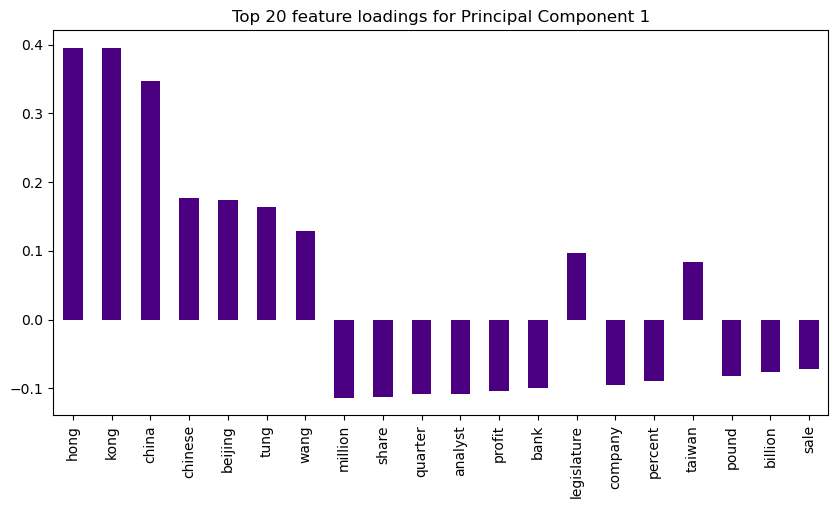

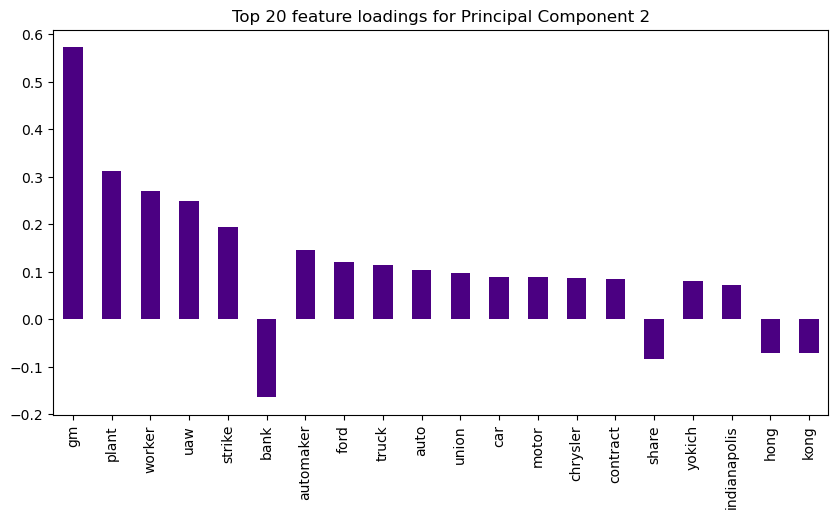

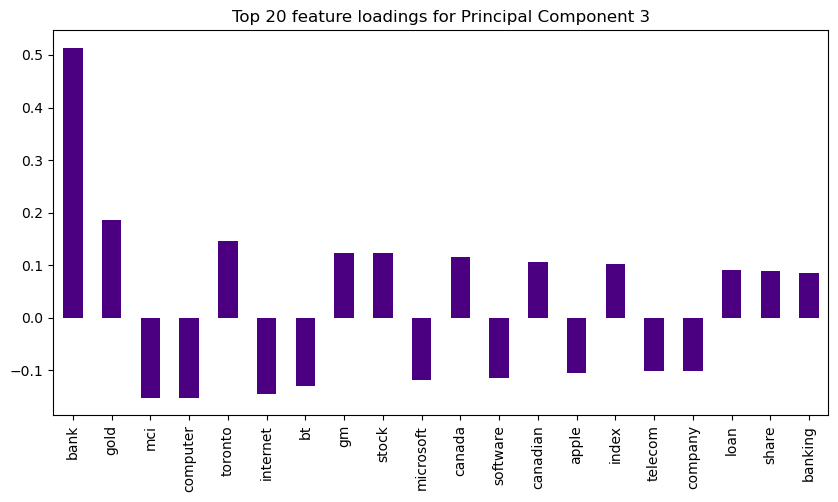

In [21]:
# Plotting the loadings of the first few principal components to visualize the contribution of each original feature

component_loadings = pd.DataFrame(pca.components_[:3], columns=tfidf_vectorizer.get_feature_names_out())
for i in range(component_loadings.shape[0]):
    plt.figure(figsize=(10, 5))
    sorted_indices = component_loadings.iloc[i].abs().sort_values(ascending=False).index[:20]
    component_loadings.iloc[i][sorted_indices].plot(kind='bar', color='indigo')
    plt.title(f'Top 20 feature loadings for Principal Component {i+1}')
    plt.show()

In [23]:
# Using the elbow heuristic to figure out the optimal number of clusters

sse = []
silhouette_scores = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_pca, kmeans.labels_))

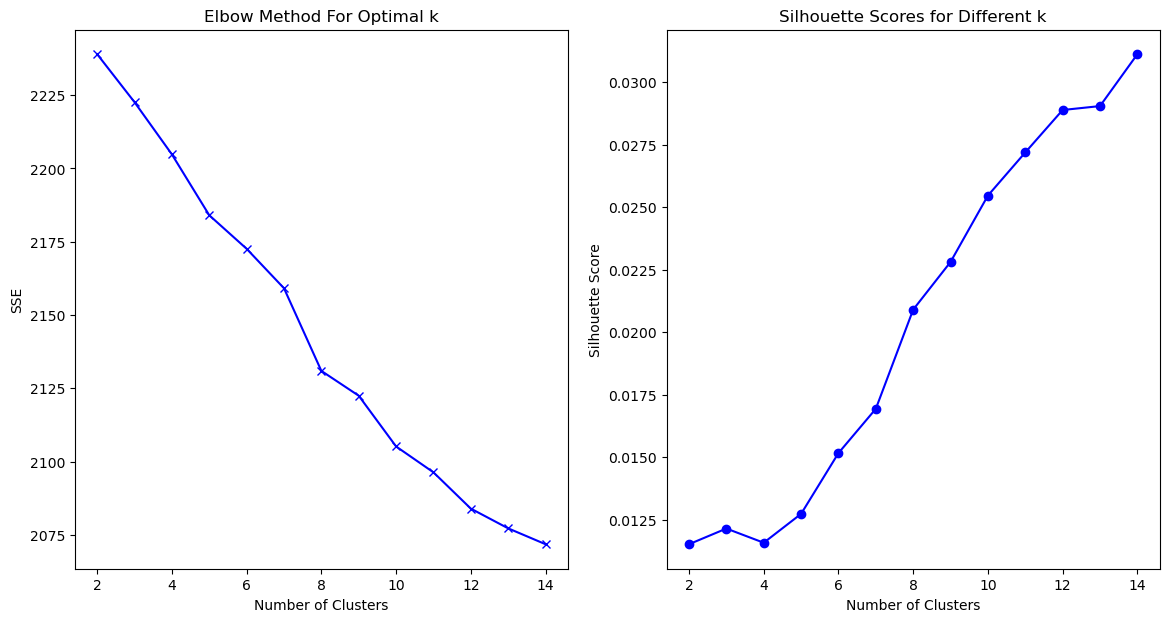

In [25]:
# Plotting SSE and Silhouette Score for each cluster number

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

##### Considering the graphs above, I chose 6 as the optimal number of clusters since :-
##### 1. It can be (roughly) considered the bend of the elbow in the graph on the left, there being no sharp decrease at any point
##### 2. It achieves a decent silhouette score compared to the other elbow point candidates I considered, i.e. 4,5,8

##### Looking at the silhouette score progression, a higher number of clusters could give us better separation - 
##### - but I wanted to cluster the authors at a more general level
##### This will probably lead to authors falling into multiple clusters - which isn't necessarily 'wrong', but we'll see.

In [27]:
# Setting the optimal k, fitting the K-means model to it, and predicting the clusters

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=123)
train_df['cluster'] = kmeans.fit_predict(X_train_pca)

In [29]:
# Transform the test data using the trained TF-IDF and PCA models

X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])
X_test_pca = pca.transform(X_test_tfidf.toarray())

# Predicting the clusters for the test data

test_df['cluster'] = kmeans.predict(X_test_pca)

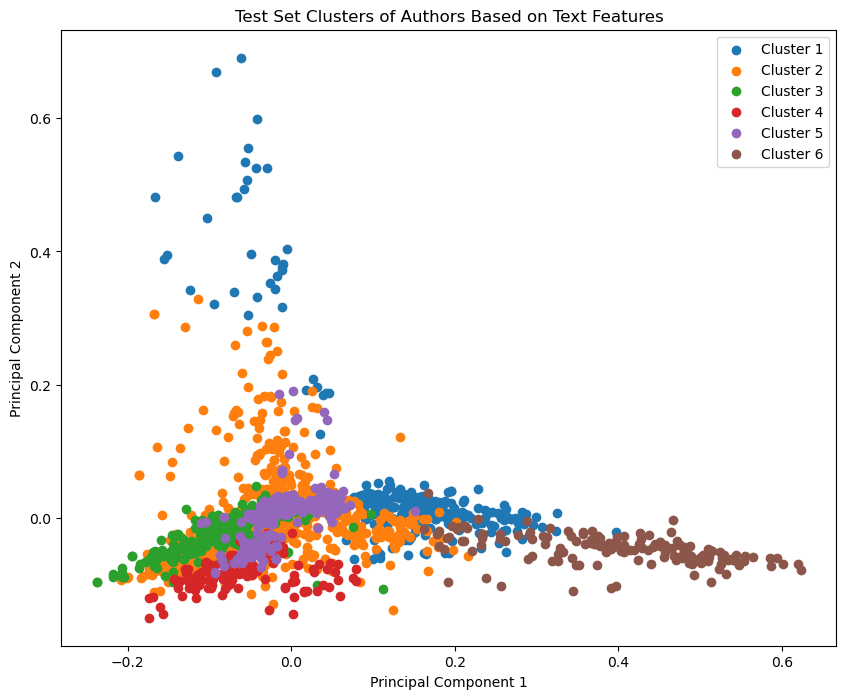

In [31]:
# Visualize the clusters on the test data

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    clustered_data = X_test_pca[test_df['cluster'] == cluster]
    plt.scatter(clustered_data[:, 0], clustered_data[:, 1], label=f'Cluster {cluster+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Set Clusters of Authors Based on Text Features')
plt.legend()
plt.show()

##### As we can see above, even with the optimal cluster number, there isn't a lot of separation among the predicted clusters.

##### We will now compare the author distribution in each cluster, against the train data

In [33]:
# Analyzing and comparing the distribution of authors in each cluster in both train and test data

print("Train Set Cluster Distribution:")
print(train_df.groupby('cluster')['author'].value_counts())

print("\nTest Set Cluster Distribution:")
print(test_df.groupby('cluster')['author'].value_counts())

for cluster in range(optimal_k):
    train_authors = train_df[train_df['cluster'] == cluster]['author'].unique()
    test_authors = test_df[test_df['cluster'] == cluster]['author'].unique()
    common_authors = set(train_authors).intersection(set(test_authors))
    print(f"\nCluster {cluster+1}:")
    print(f"Common Authors in Train and Test: {common_authors}")

Train Set Cluster Distribution:
cluster  author         
0        BenjaminKangLim    47
         JaneMacartney      46
         MureDickie         44
         ScottHillis        40
         DavidLawder        39
                            ..
5        ScottHillis         5
         GrahamEarnshaw      2
         LynneO'Donnell      2
         MureDickie          2
         JaneMacartney       1
Name: count, Length: 131, dtype: int64

Test Set Cluster Distribution:
cluster  author         
0        JaneMacartney      45
         ScottHillis        42
         BenjaminKangLim    41
         MureDickie         36
         WilliamKazer       28
                            ..
5        MureDickie          5
         ScottHillis         4
         BenjaminKangLim     3
         JaneMacartney       1
         KirstinRidley       1
Name: count, Length: 129, dtype: int64

Cluster 1:
Common Authors in Train and Test: {'JaneMacartney', 'BenjaminKangLim', 'JimGilchrist', 'GrahamEarnshaw', 'DavidLaw

##### We can see above that certain authors are represented in more than one cluster.

##### While the first instinct might be to think that the clustering algorithm parameters need to be adjusted, -
##### - or perhaps the number of principal components, there might be other explanations :-
##### 1. Certain authors might write more than one type of report, spanning multiple topics or genres.
##### 2. Different topics might still exhibit similar stylistic features, leading to overlap in cluster assignments.
##### 3. The topics within the dataset may be complex and nuanced, making it difficult for the algorithm to neatly separate them into distinct clusters.

##### We will attempt to analyze this.

In [35]:
# Analyze the distribution of clusters for each author

cluster_distribution = train_df.groupby('author')['cluster'].nunique()
print(cluster_distribution.sort_values(ascending=False))
#print(len(cluster_distribution[cluster_distribution>1]))

author
GrahamEarnshaw       5
JohnMastrini         4
BradDorfman          4
SarahDavison         4
JimGilchrist         4
MureDickie           4
KevinDrawbaugh       4
JaneMacartney        4
AaronPressman        3
MarcelMichelson      3
AlanCrosby           3
LydiaZajc            3
LynneO'Donnell       3
MartinWolk           3
MarkBendeich         3
PatriciaCommins      3
PierreTran           3
ScottHillis          3
SimonCowell          3
TanEeLyn             3
KevinMorrison        3
WilliamKazer         3
AlexanderSmith       3
JoWinterbottom       3
JanLopatka           3
BernardHickey        3
KeithWeir            2
PeterHumphrey        2
ToddNissen           2
TheresePoletti       2
BenjaminKangLim      2
DarrenSchuettler     2
SamuelPerry          2
RogerFillion         2
RobinSidel           2
DavidLawder          2
KouroshKarimkhany    2
KarlPenhaul          2
NickLouth            2
EricAuchard          2
MichaelConnor        2
MatthewBunce         2
FumikoFujisaki       2
Lynn

##### As expected, most authors are being grouped in multiple clusters.
##### We could probably resolve this to an extent by increasing the number of clusters to a point with much higher separation -
##### - based on the silhouette score, but again, my aim was to get a more general clustering.

##### Let's try to analyze sample articles for each of the multi-cluster authors

In [37]:
# Find authors who write in multiple clusters

multi_cluster_authors = cluster_distribution[cluster_distribution > 1].index

# Print sample articles for these authors

for author in multi_cluster_authors:
    print(f'\nAuthor: {author}')
    for cluster in train_df[train_df['author'] == author]['cluster'].unique():
        print(f'\nCluster {cluster} Articles:')
        # Get all texts for the given author and cluster
        cluster_texts = train_df[(train_df['author'] == author) & (train_df['cluster'] == cluster)]['text']
        
        # Determine the number of samples to take
        num_samples = min(2, len(cluster_texts))
        
        # Sample the texts
        sample_texts = cluster_texts.sample(num_samples, random_state=123, replace=False)
        for text in sample_texts:
            print(f' - {text[:200]}...')  # Print first 200 characters for brevity


Author: AaronPressman

Cluster 2 Articles:
 - unveiled new plan monday boost sale computer encoding technology considered key component global communication development commerce internet plan intended foster growth online commerce worldwide still...
 - legislator introduced two bill thursday overturn clinton administration export limit computer encryption technology key component online commerce global communication encryption product scramble infor...

Cluster 1 Articles:
 - influential global research group preparing guideline encryption policy member country duck contentious issue involved according draft report obtained reuters clinton administration seeking rally supp...
 - elementary school student access internet learned kid lacked access indepedent research group concluded conducting comparative study seven urban school district study dramatically illustrates positive...

Cluster 3 Articles:
 - prospect comprehensive reform banking financial service law remain bright despite p

In [39]:
# Identifying the subject areas/key terms for each cluster

def get_topic_modeling(df, cluster_col, n_topics=6, n_top_words=10):
    from sklearn.decomposition import LatentDirichletAllocation
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    topic_descriptions = {}
    for cluster in df[cluster_col].unique():
        cluster_texts = df[df[cluster_col] == cluster]['text']
        X = vectorizer.fit_transform(cluster_texts)
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=123)
        lda.fit(X)
        
        feature_names = vectorizer.get_feature_names_out()
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
            topics.append(f'Topic {topic_idx}: ' + ', '.join(top_words))
        topic_descriptions[f'Cluster {cluster}'] = topics
    return topic_descriptions

# Get topic modeling descriptions for each of the clusters

kmeans_topic_models = get_topic_modeling(train_df, 'cluster')
for cluster, topics in kmeans_topic_models.items():
    print(f'\n{cluster} Topics:')
    for topic in topics:
        print(f' - {topic}')


Cluster 2 Topics:
 - Topic 0: sybase, affordable, universal, rural, intellect, techway, pcorder, school, prodigy, cooley
 - Topic 1: analyst, service, software, microsoft, apple, internet, company, quarter, computer, said
 - Topic 2: wireless, merger, market, cable, deal, british, amp, telecom, mci, bt
 - Topic 3: stead, respect, brutal, learning, shah, merrin, firestone, savesmart, edmark, ingram
 - Topic 4: camera, michigan, trademark, society, domain, address, macromedia, export, committee, encryption
 - Topic 5: schrader, shakeout, restaurant, caucus, adult, poll, congress, legislator, pointcast, nextwave

Cluster 1 Topics:
 - Topic 0: ferry, florida, andreas, tobacco, cathay, moscow, tunnel, adm, russian, russia
 - Topic 1: bramble, fidelity, usair, ashland, caterpillar, hirsch, comalco, highland, liberte, air
 - Topic 2: hoffa, radar, barnes, iraqi, ecopetrol, moorfield, sainsbury, pru, uso, scotam
 - Topic 3: pound, profit, market, analyst, share, year, percent, company, millio

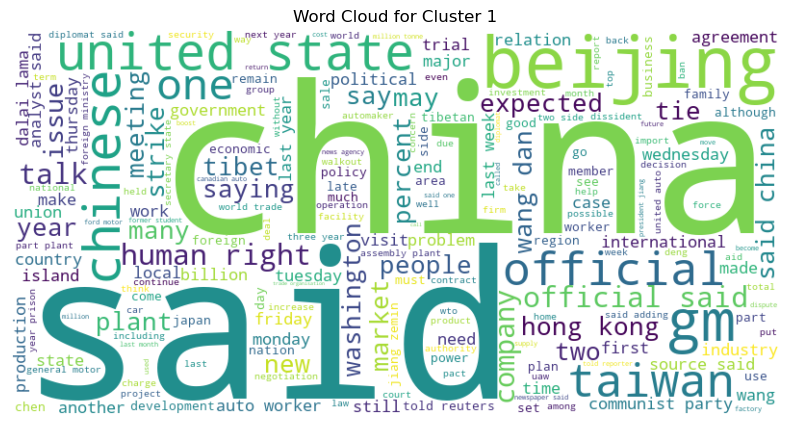

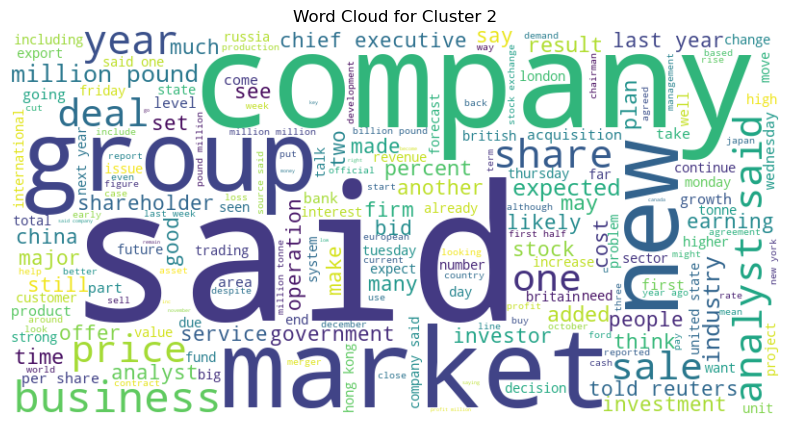

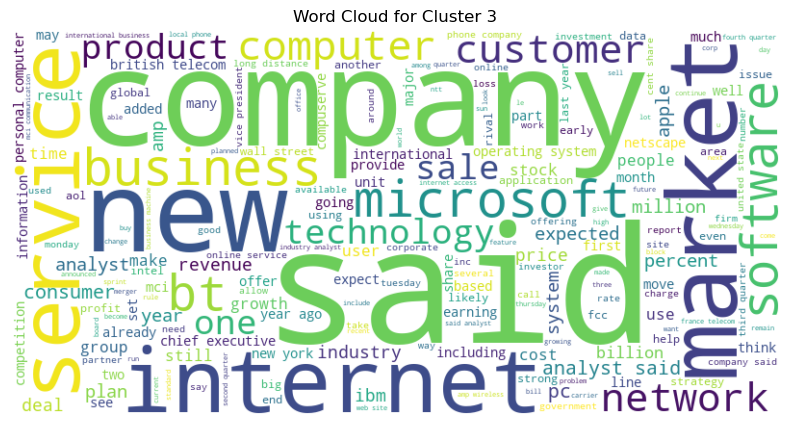

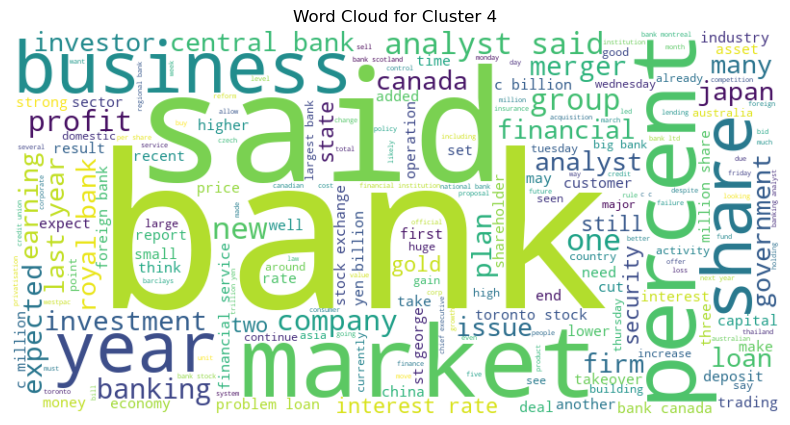

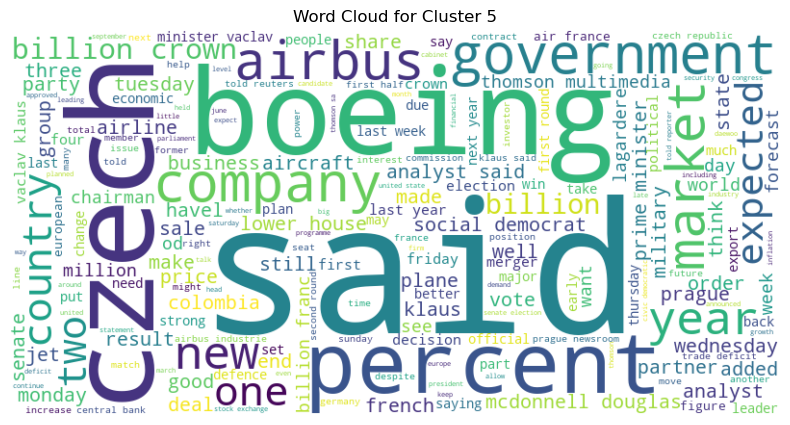

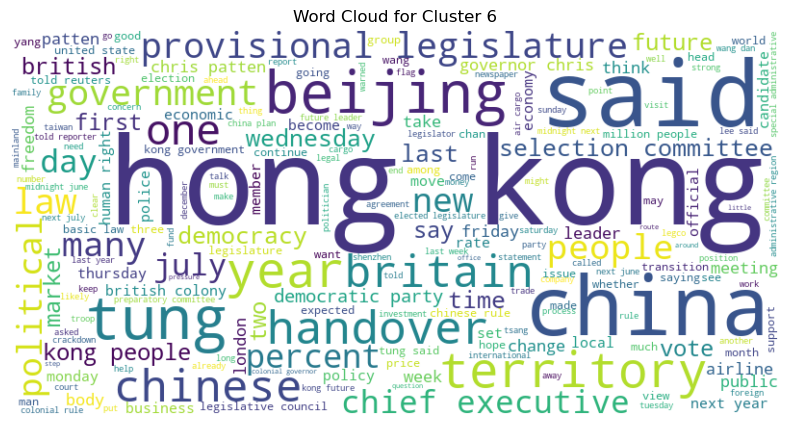

In [41]:
# Word cloud for each cluster

from wordcloud import WordCloud

for cluster in range(optimal_k):
    cluster_texts = ' '.join(train_df[train_df['cluster'] == cluster]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster+1}')
    plt.show()

### Results

##### Dimensionality Reduction: The code identified the optimal number of PCA components (1500) that captured >95% of the variance in the TF-IDF features, 
##### effectively reducing the dimensionality of the text data while retaining most of the information.

##### Optimal Clusters: Using the elbow method and silhouette scores, the optimal number of clusters was determined to be 6. 
##### These clusters were then used to group the authors based on similarities in their writing styles.

##### Cluster Distribution: The distribution of authors across clusters in both the training and test sets was analyzed. 
##### It was found that some authors' texts spanned multiple clusters.

##### Topic Modeling: The topic modeling revealed distinct topics within each cluster.

##### Word Cloud: A word cloud was generated for each cluster, exhibiting the most-used words for each.

### Conclusion

##### The use of PCA for dimensionality reduction was crucial in making the clustering process feasible and effective. 
##### By reducing the TF-IDF feature space while retaining >95% of the variance, the analysis maintained the feature-richness of the original data. 
##### This balance between dimensionality reduction and information preservation ensured that the clustering reflected meaningful patterns in the text data.

##### The clustering approach proved effective in categorizing the texts in a way that reflects underlying similarities, 
##### suggesting that authors who are grouped together share certain linguistic or thematic characteristics.

##### It's interesting that certain authors' texts appear in multiple clusters. 
##### This indicates that these authors exhibit versatility in their writing, covering a range of topics or 
##### adapting their style according to different contexts. 
##### Such multi-cluster authors might be engaging with various genres, audiences, or subject matters, making them 
##### more complex in terms of their writing profile.

##### The integration of topic modeling within each cluster added another layer of understanding 
##### by revealing the dominant themes or topics present in the clusters.
##### For example, one cluster might be dominated by financial topics, while another might focus on political commentary. 
##### These thematic insights are valuable for understanding the broader context of the texts within each cluster.